In [1]:
from multi_imbalance.datasets import load_datasets
import experiment as ex
from sklearn.model_selection import StratifiedKFold
from collections import Counter, defaultdict
from multi_imbalance.utils.metrics import gmean_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from utils import plot_embeddings
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
import torch
from utils import calc_embeddings

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
datasets = load_datasets()

In [3]:
ds_name = 'cmc'
test_on_all_folds = True
test_all_ds = True

In [4]:
datasets = ex.one_hot_encode_all(datasets)

In [5]:
config = ex.config_calculation_strategy3(datasets)

In [6]:
np.unique(datasets["new_yeast"]['target'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)

In [7]:
config['cmc'] = {'nn_config': {'units_1st_layer': 17,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 16},
 'weighted_triplet_loss': True,
 'lr': 0.0005,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['dermatology'] = {'nn_config': {'units_1st_layer': 97,
   'units_2nd_layer': 512,
   'units_3rd_layer': 256,
   'units_latent_layer': 16},
  'weighted_triplet_loss': True,
  'lr': 0.0015,
  'batch_size': 16,
  'gamma': 0.95,
  'epochs': 50}

config['hayes-roth'] = {'nn_config': {'units_1st_layer': 11,
  'units_2nd_layer': 128,
  'units_3rd_layer': 64,
  'units_latent_layer': 12},
 'weighted_triplet_loss': True,
 'lr': 0.005,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 100}

config['new_vehicle'] = {'nn_config': {'units_1st_layer': 18,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 16},
 'weighted_triplet_loss': True,
 'lr': 0.003,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['new_yeast'] = {'nn_config': {'units_1st_layer': 9,
  'units_2nd_layer': 300,
  'units_3rd_layer': 200,
  'units_latent_layer': 6},
 'weighted_triplet_loss': True,
 'lr': 0.003,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 100}

config['balance-scale'] = {'nn_config': {'units_1st_layer': 16,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 3},
 'weighted_triplet_loss': True,
 'lr': 0.0004,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['cleveland'] = {'nn_config': {'units_1st_layer': 24,
  'units_2nd_layer': 72,
  'units_3rd_layer': 48,
  'units_latent_layer': 16},
 'weighted_triplet_loss': True,
 'lr': 0.004,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['cleveland_v2'] = {'nn_config': {'units_1st_layer': 23,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 8},
 'weighted_triplet_loss': True,
 'lr': 0.004,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['glass'] = {'nn_config': {'units_1st_layer': 9,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 16},
 'weighted_triplet_loss': True,
 'lr': 0.003,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['thyroid-newthyroid'] = {'nn_config': {'units_1st_layer': 5,
  'units_2nd_layer': 64,
  'units_3rd_layer': 32,
  'units_latent_layer': 8},
 'weighted_triplet_loss': True,
 'lr': 0.003,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 100}

config['new_ecoli'] = {'nn_config': {'units_1st_layer': 7,
  'units_2nd_layer': 128,
  'units_3rd_layer': 64,
  'units_latent_layer': 8},
 'weighted_triplet_loss': True,
 'lr': 0.005,
 'batch_size': 16,
 'gamma': 0.85,
 'epochs': 100}

config['new_led7digit'] = {'nn_config': {'units_1st_layer': 7,
  'units_2nd_layer': 64,
  'units_3rd_layer': 32,
  'units_latent_layer': 8},
 'weighted_triplet_loss': True,
 'lr': 0.003,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 70}

config['new_winequality-red'] = {'nn_config': {'units_1st_layer': 11,
  'units_2nd_layer': 128,
  'units_3rd_layer': 64,
  'units_latent_layer': 12},
 'weighted_triplet_loss': True,
 'lr': 0.003,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 100}

config['4delikatne-bezover-cut'] = {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100}

In [8]:
from experiment import dt_name_to_cols_to_encode

In [9]:
for dataset_name in dt_name_to_cols_to_encode:
    data, target = datasets[dataset_name]['data'], datasets[dataset_name]['target']
    config[f"{dataset_name}"]['nn_config']['units_decision_layer'] = np.unique(target).size
    config[f"{dataset_name}_encoded"]['nn_config']['units_decision_layer'] = np.unique(target).size

In [10]:
config

{'1czysty-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 16,
   'units_3rd_layer': 8,
   'units_latent_layer': 4,
   'units_decision_layer': 3},
  'weighted_triplet_loss': True,
  'lr': 0.003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100},
 '2delikatne-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 16,
   'units_3rd_layer': 8,
   'units_latent_layer': 4,
   'units_decision_layer': 3},
  'weighted_triplet_loss': True,
  'lr': 0.003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100},
 '3mocniej-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 16,
   'units_3rd_layer': 8,
   'units_latent_layer': 4,
   'units_decision_layer': 3},
  'weighted_triplet_loss': True,
  'lr': 0.003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100},
 '4delikatne-bezover-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 4,
   'units_decision_layer': 3},
  'weighted_triplet_los

cmc


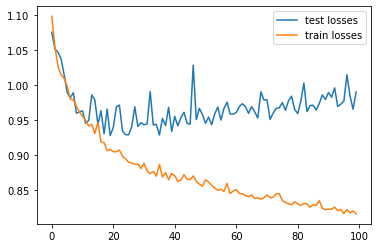

100%|██████████| 1178/1178 [00:00<00:00, 3186.32it/s]


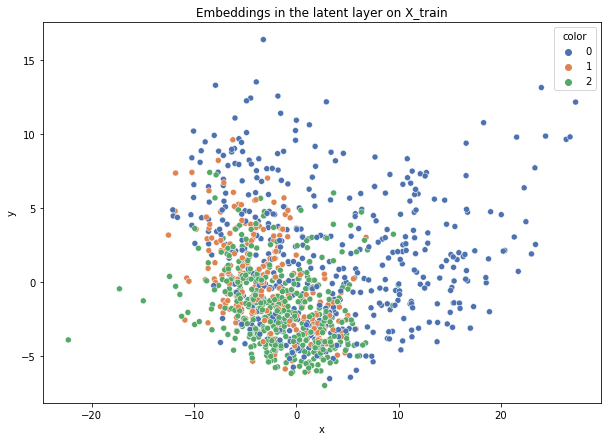

Softmax-f1: 0.501
Softmax-gmean: 0.507


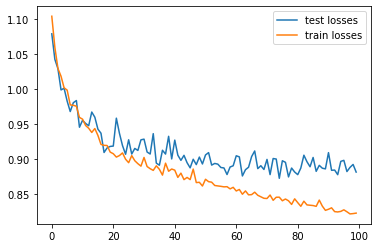

100%|██████████| 1178/1178 [00:00<00:00, 3534.69it/s]


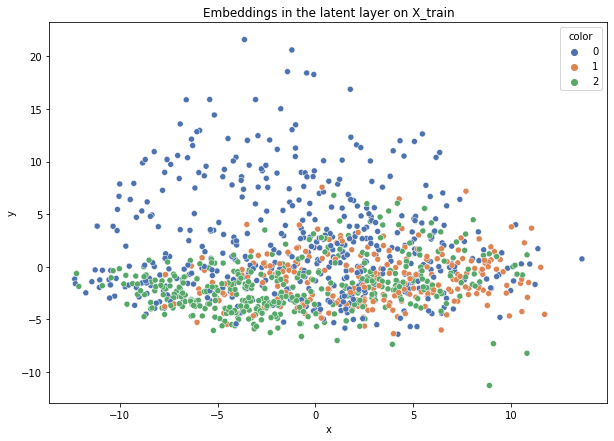

Softmax-f1: 0.577
Softmax-gmean: 0.586


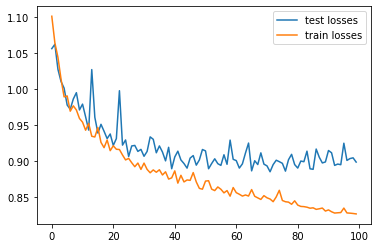

100%|██████████| 1178/1178 [00:00<00:00, 3446.26it/s]


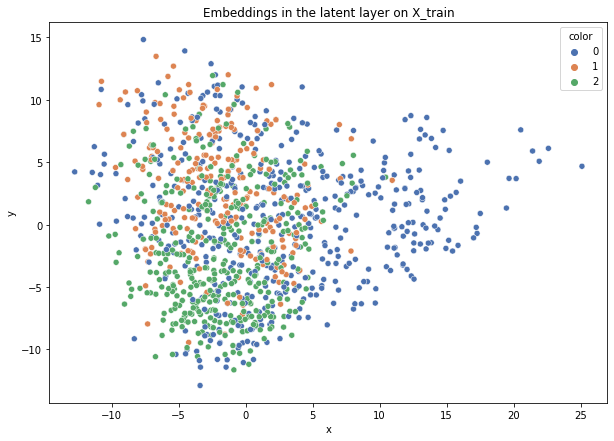

Softmax-f1: 0.528
Softmax-gmean: 0.514


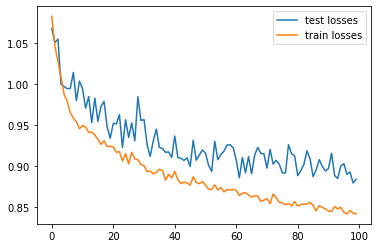

100%|██████████| 1179/1179 [00:00<00:00, 3447.57it/s]


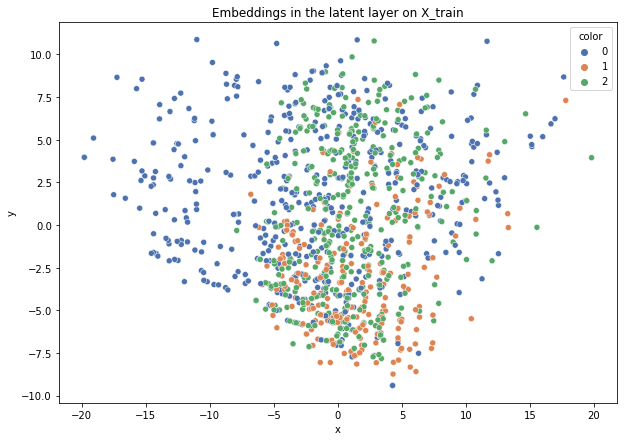

Softmax-f1: 0.541
Softmax-gmean: 0.525


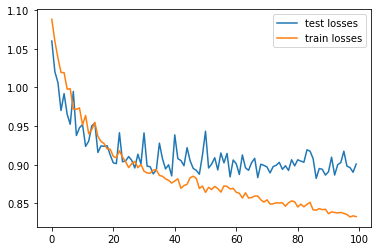

100%|██████████| 1179/1179 [00:00<00:00, 3407.07it/s]


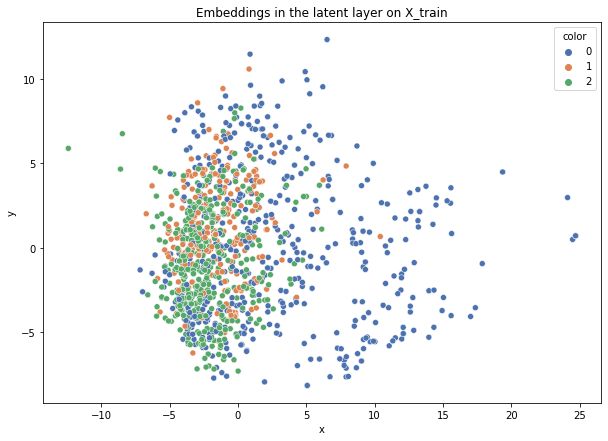

Softmax-f1: 0.561
Softmax-gmean: 0.545
dermatology


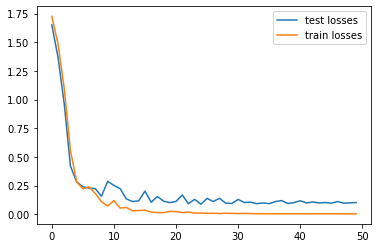

100%|██████████| 292/292 [00:00<00:00, 3377.07it/s]


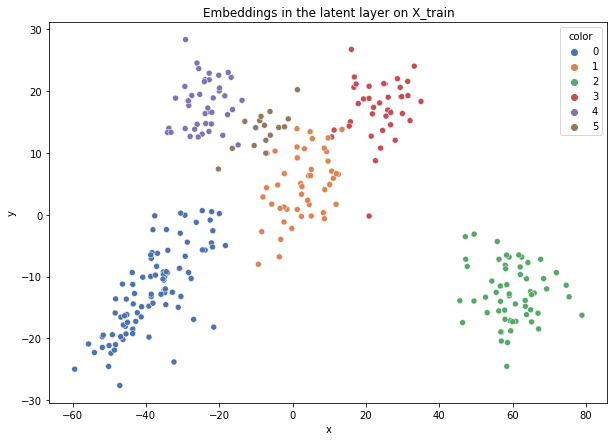

Softmax-f1: 0.96
Softmax-gmean: 0.956


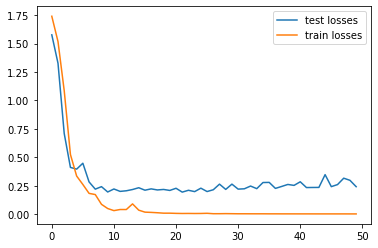

100%|██████████| 293/293 [00:00<00:00, 3332.82it/s]


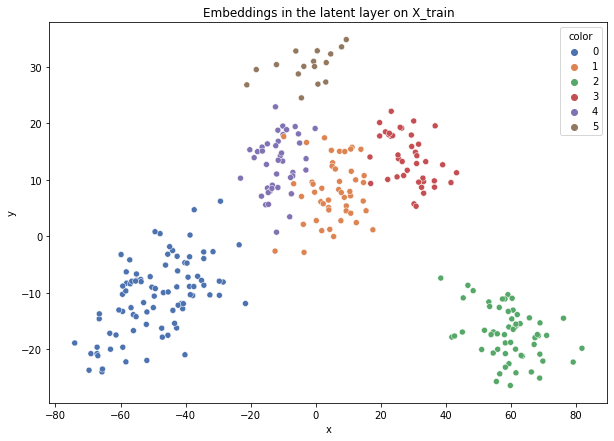

Softmax-f1: 0.919
Softmax-gmean: 0.914


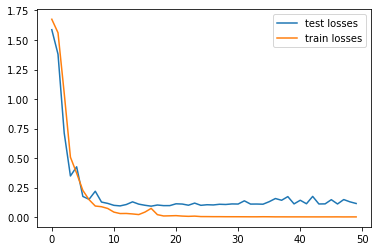

100%|██████████| 293/293 [00:00<00:00, 3407.42it/s]


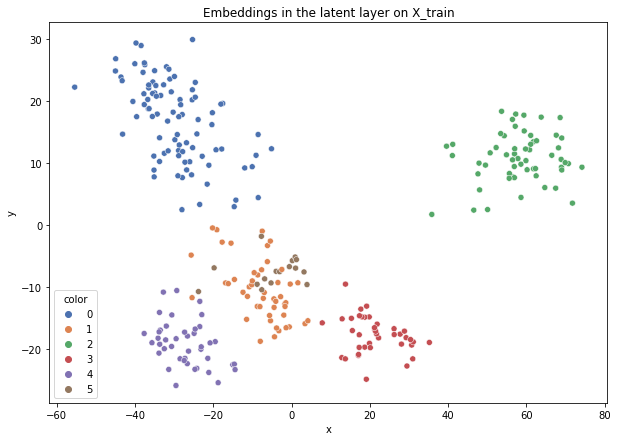

Softmax-f1: 0.954
Softmax-gmean: 0.95


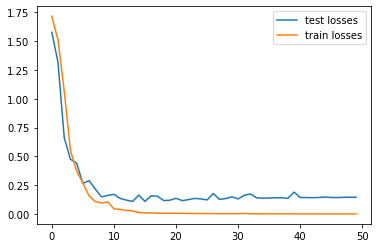

100%|██████████| 293/293 [00:00<00:00, 2038.20it/s]


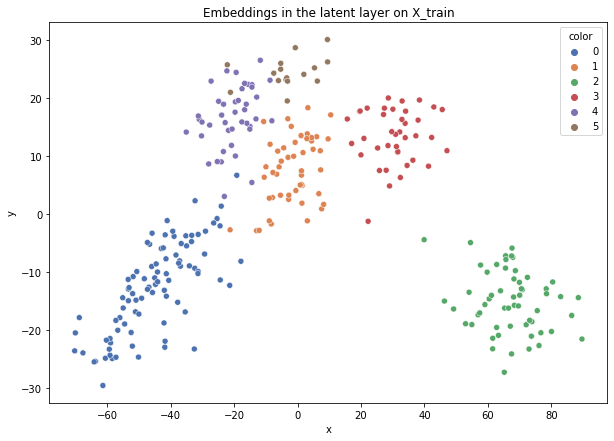

Softmax-f1: 0.954
Softmax-gmean: 0.95


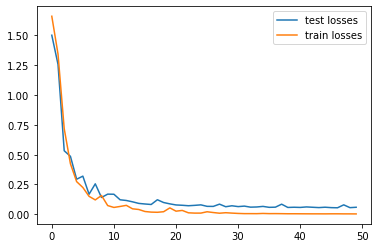

100%|██████████| 293/293 [00:00<00:00, 3375.93it/s]


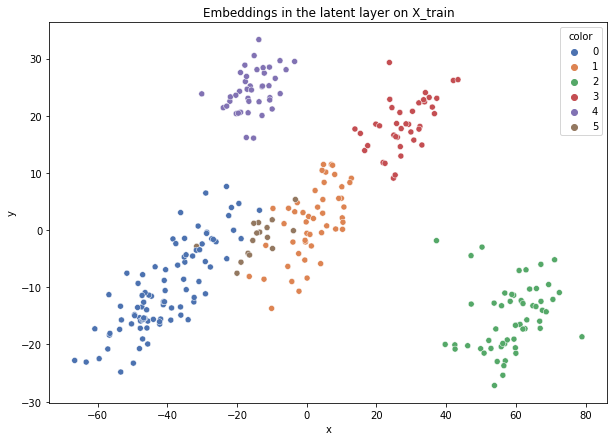

Softmax-f1: 0.972
Softmax-gmean: 0.953
hayes-roth


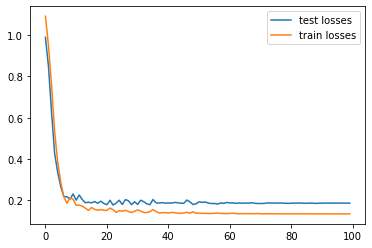

100%|██████████| 128/128 [00:00<00:00, 3304.23it/s]


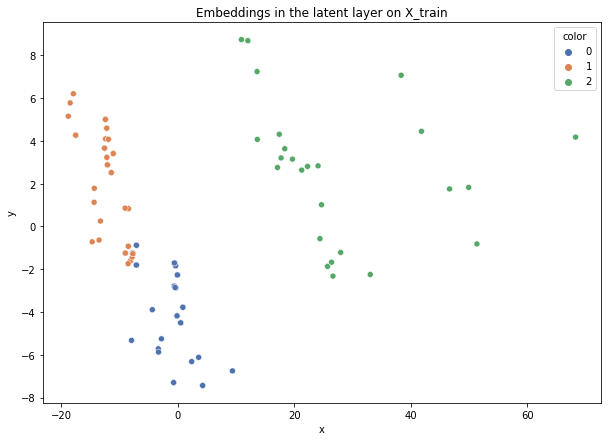

Softmax-f1: 0.897
Softmax-gmean: 0.892


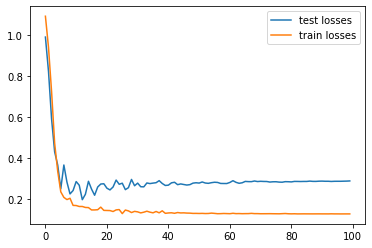

100%|██████████| 128/128 [00:00<00:00, 3485.93it/s]


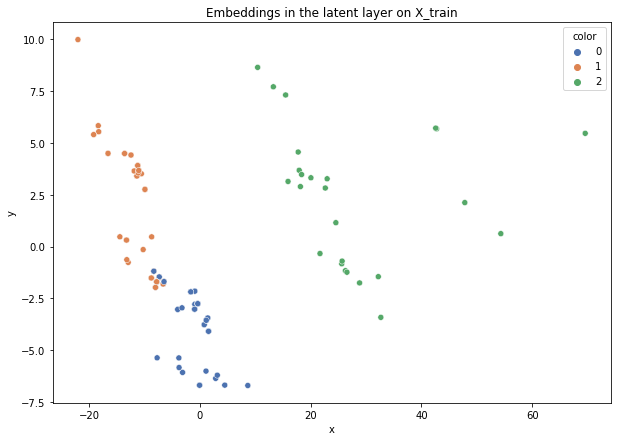

Softmax-f1: 0.845
Softmax-gmean: 0.837


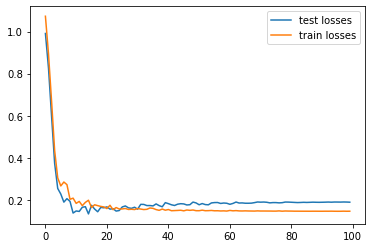

100%|██████████| 128/128 [00:00<00:00, 3337.84it/s]


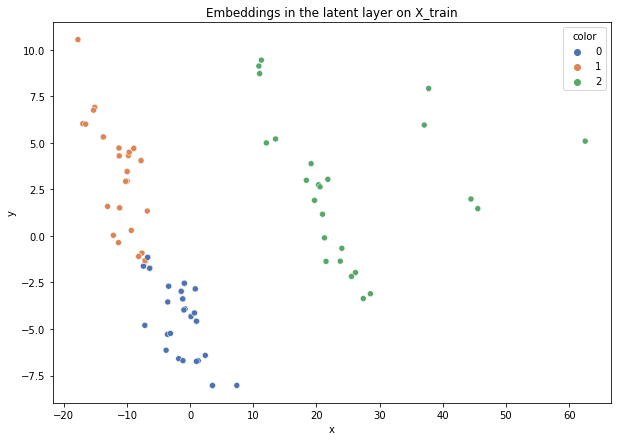

Softmax-f1: 0.948
Softmax-gmean: 0.946


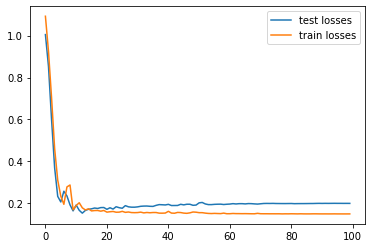

100%|██████████| 128/128 [00:00<00:00, 3392.44it/s]


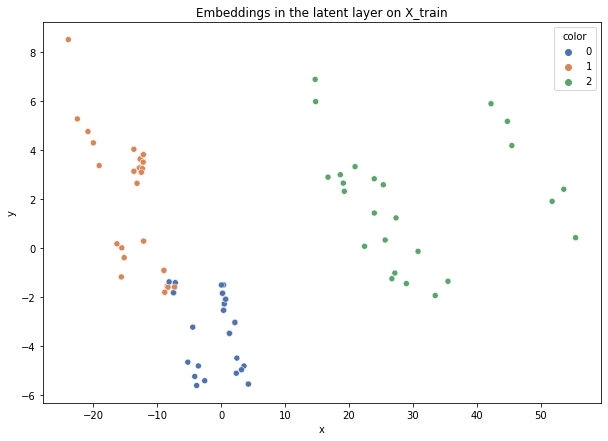

Softmax-f1: 0.949
Softmax-gmean: 0.948


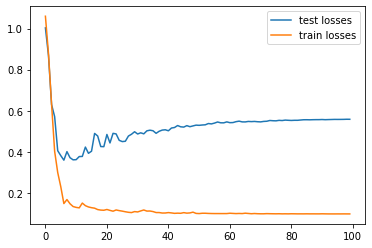

100%|██████████| 128/128 [00:00<00:00, 3440.64it/s]


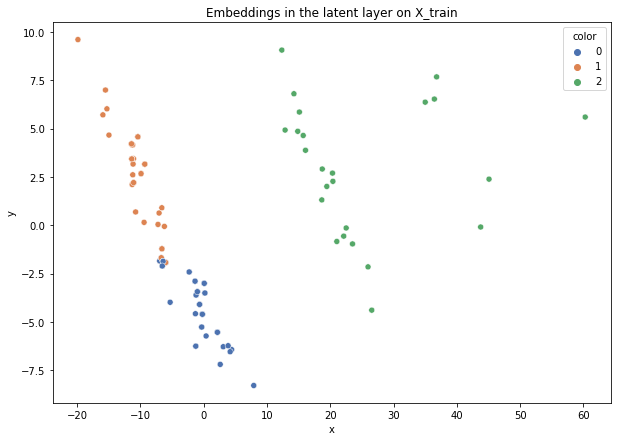

Softmax-f1: 0.812
Softmax-gmean: 0.8
new_vehicle


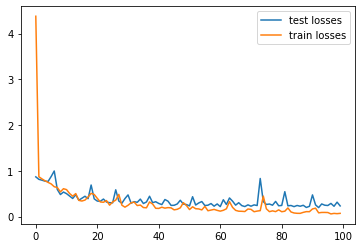

100%|██████████| 676/676 [00:00<00:00, 2652.24it/s]


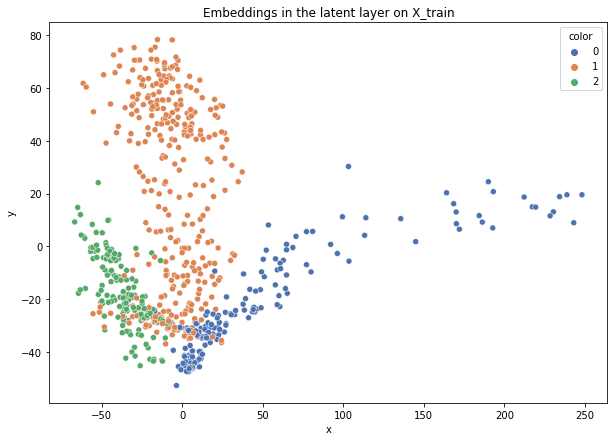

Softmax-f1: 0.911
Softmax-gmean: 0.915


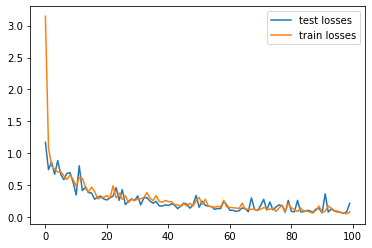

100%|██████████| 677/677 [00:00<00:00, 3411.39it/s]


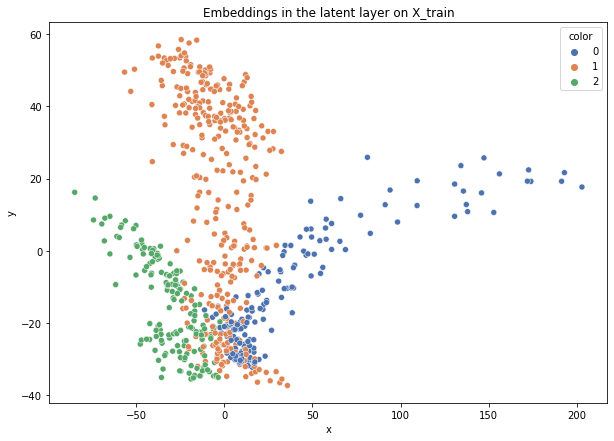

Softmax-f1: 0.911
Softmax-gmean: 0.912


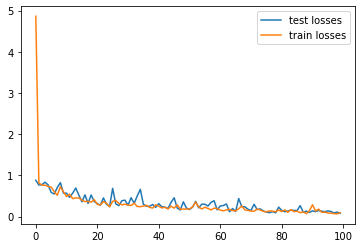

100%|██████████| 677/677 [00:00<00:00, 3422.73it/s]


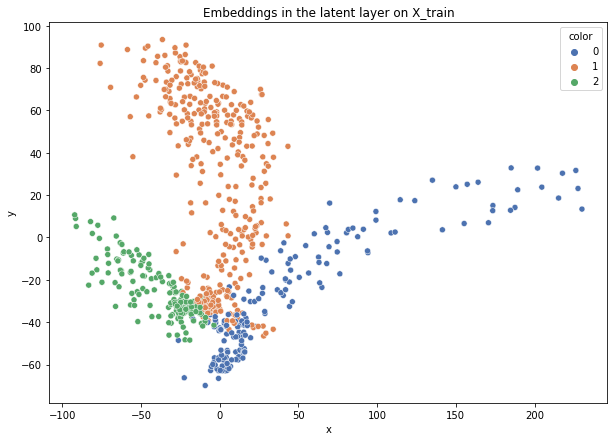

Softmax-f1: 0.976
Softmax-gmean: 0.972


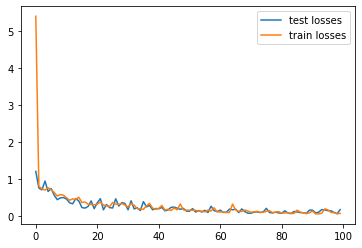

100%|██████████| 677/677 [00:00<00:00, 3407.38it/s]


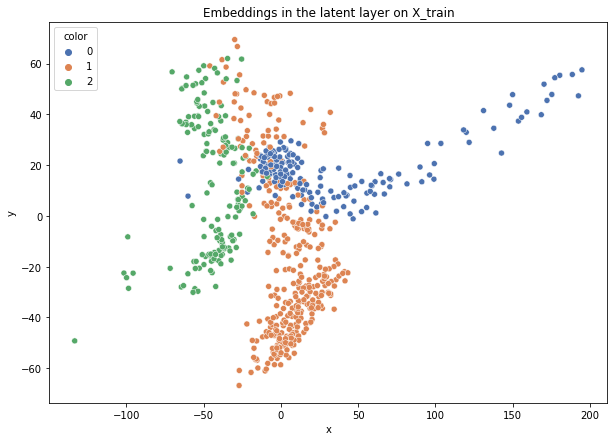

Softmax-f1: 0.919
Softmax-gmean: 0.9


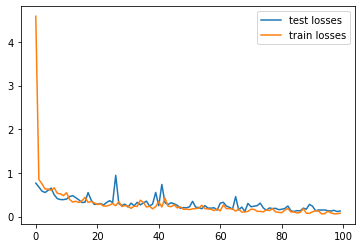

100%|██████████| 677/677 [00:00<00:00, 3408.69it/s]


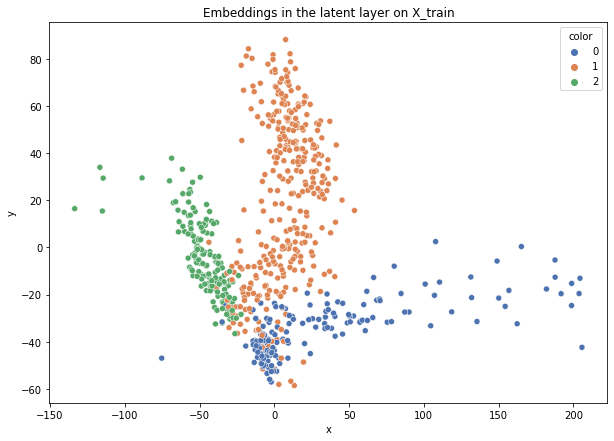

Softmax-f1: 0.959
Softmax-gmean: 0.952
new_yeast


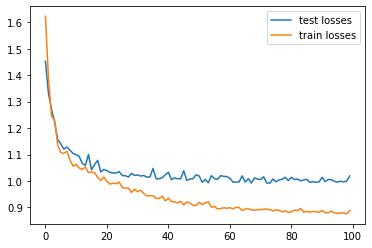

100%|██████████| 1187/1187 [00:00<00:00, 3454.94it/s]


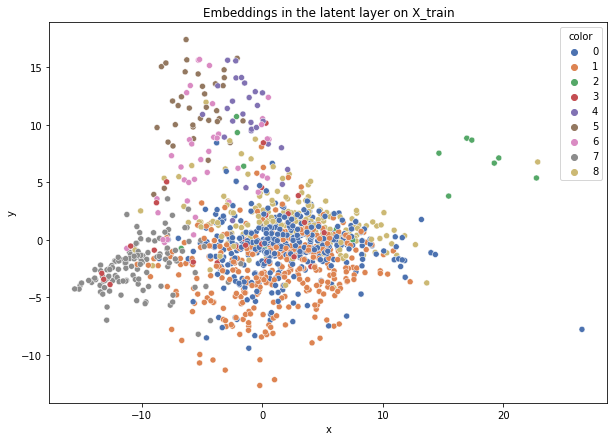

Softmax-f1: 0.576
Softmax-gmean: 0.307


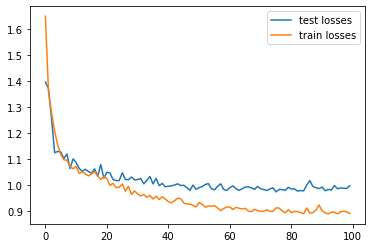

100%|██████████| 1187/1187 [00:00<00:00, 3405.49it/s]


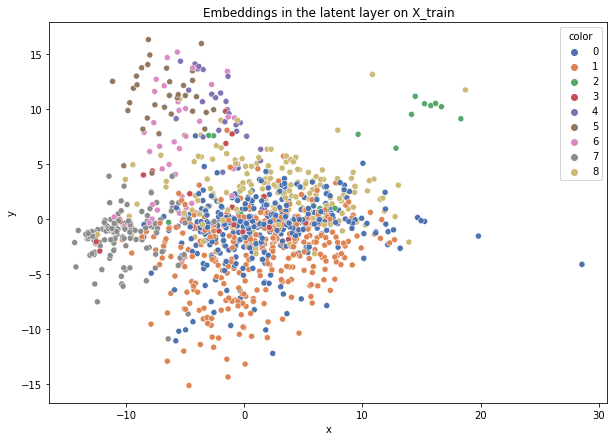

Softmax-f1: 0.571
Softmax-gmean: 0.304


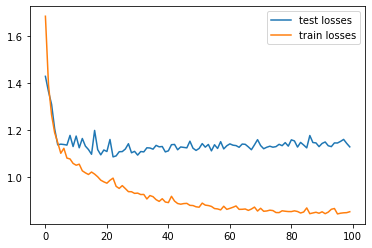

100%|██████████| 1187/1187 [00:00<00:00, 3289.10it/s]


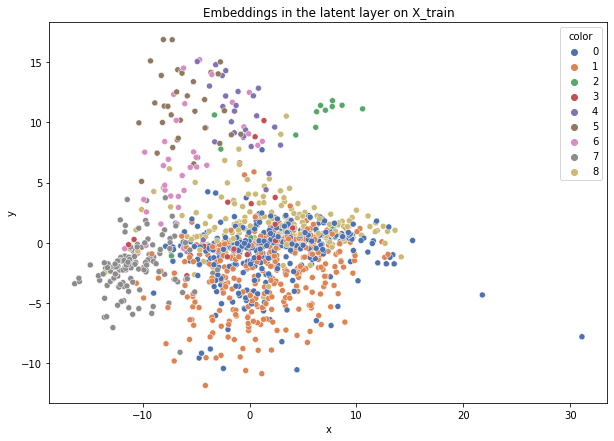

Softmax-f1: 0.51
Softmax-gmean: 0.266


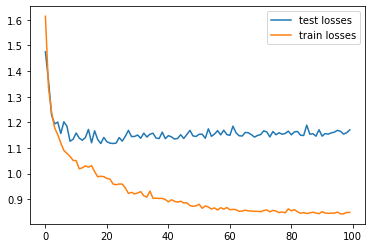

100%|██████████| 1187/1187 [00:00<00:00, 3472.62it/s]


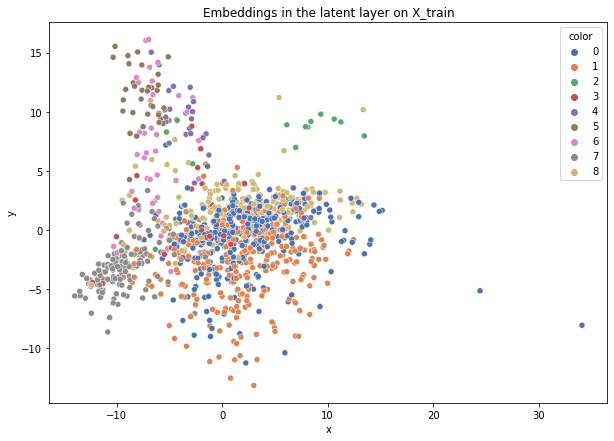

Softmax-f1: 0.456
Softmax-gmean: 0.235


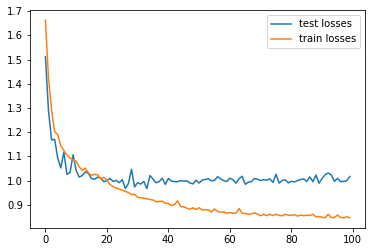

100%|██████████| 1188/1188 [00:00<00:00, 3412.41it/s]


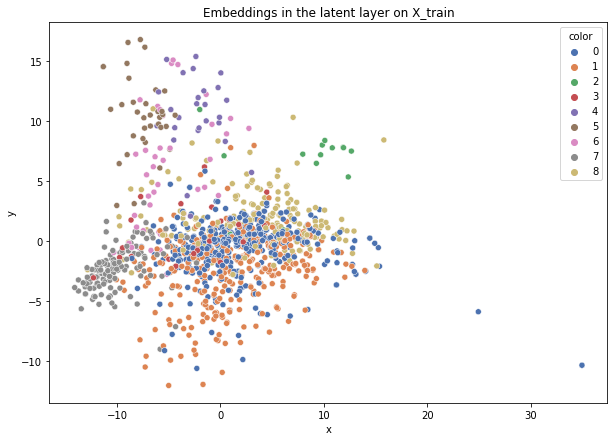

Softmax-f1: 0.537
Softmax-gmean: 0.28
1czysty-cut


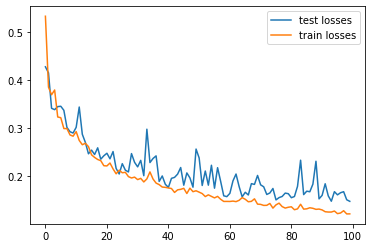

100%|██████████| 960/960 [00:00<00:00, 3447.30it/s]


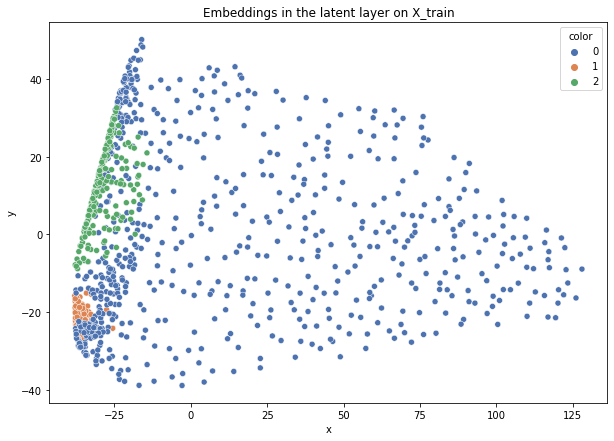

Softmax-f1: 0.921
Softmax-gmean: 0.895


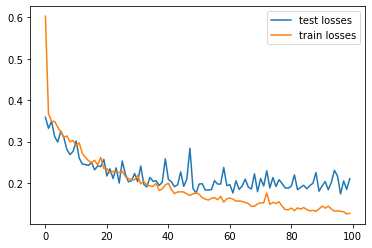

100%|██████████| 960/960 [00:00<00:00, 3477.61it/s]


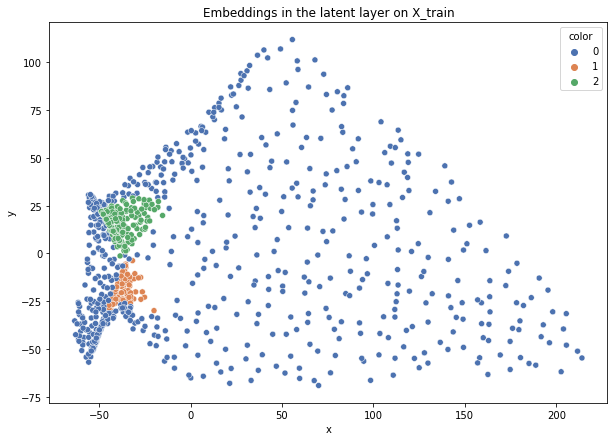

Softmax-f1: 0.862
Softmax-gmean: 0.82


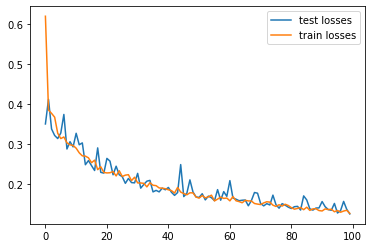

100%|██████████| 960/960 [00:00<00:00, 3534.44it/s]


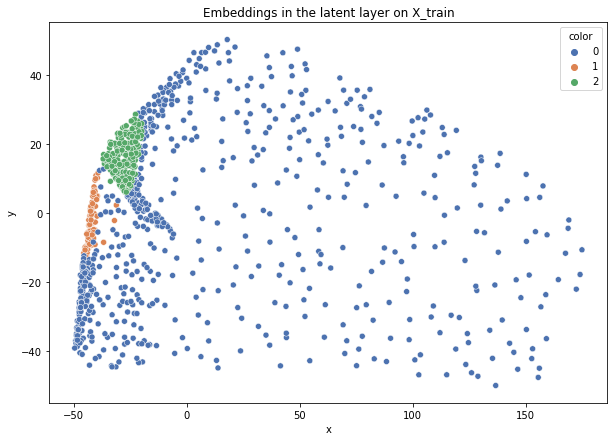

Softmax-f1: 0.951
Softmax-gmean: 0.937


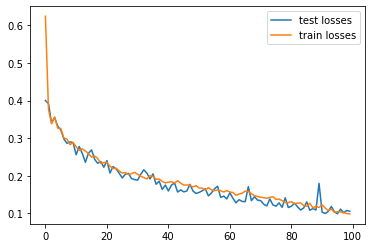

100%|██████████| 960/960 [00:00<00:00, 2750.49it/s]


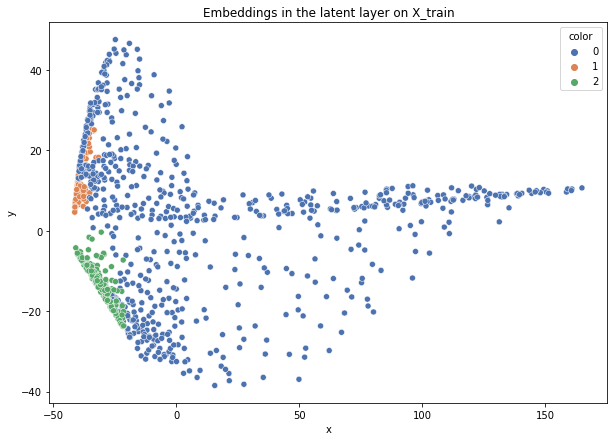

Softmax-f1: 0.962
Softmax-gmean: 0.972


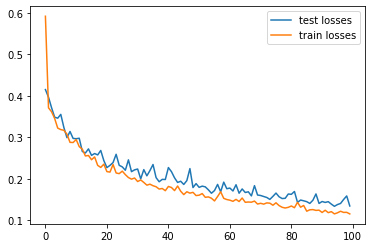

100%|██████████| 960/960 [00:00<00:00, 3461.38it/s]


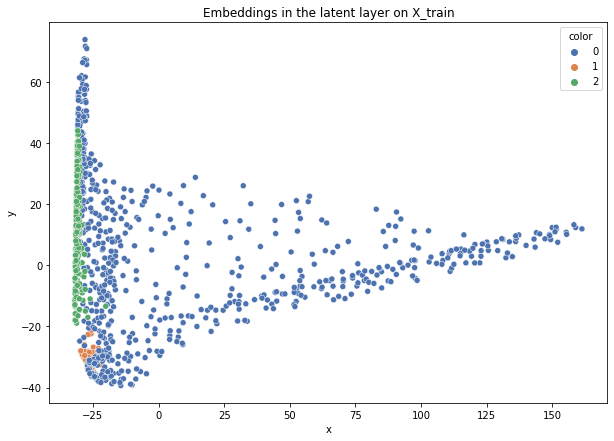

Softmax-f1: 0.955
Softmax-gmean: 0.957
2delikatne-cut


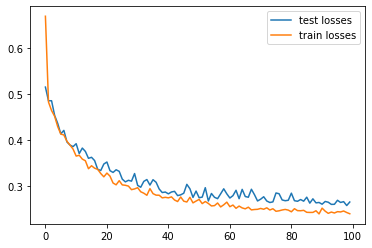

100%|██████████| 960/960 [00:00<00:00, 3424.48it/s]


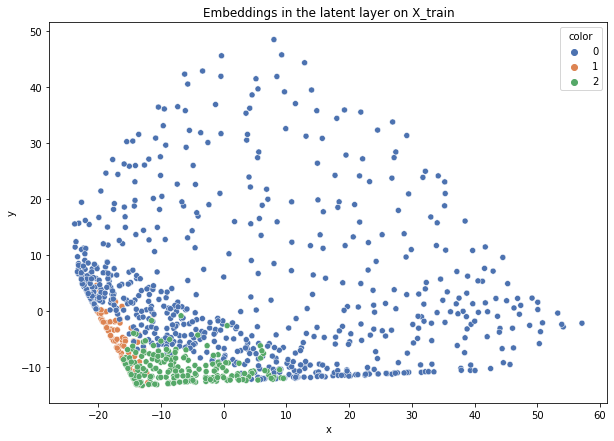

Softmax-f1: 0.79
Softmax-gmean: 0.743


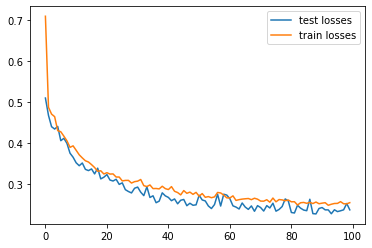

100%|██████████| 960/960 [00:00<00:00, 3456.99it/s]


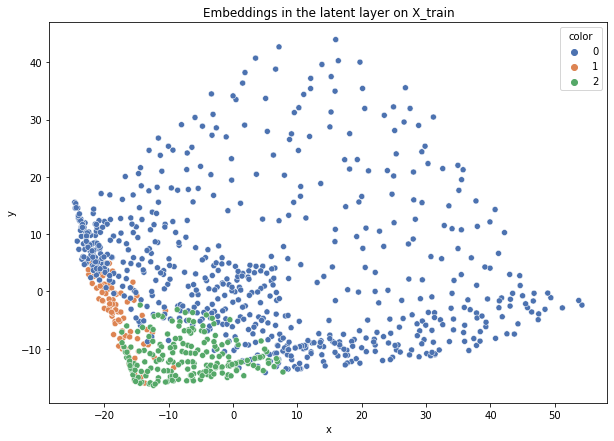

Softmax-f1: 0.802
Softmax-gmean: 0.787


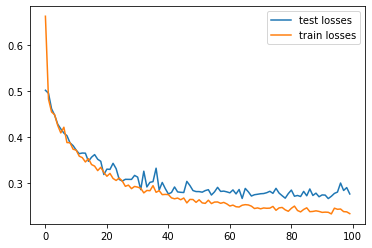

100%|██████████| 960/960 [00:00<00:00, 3333.75it/s]


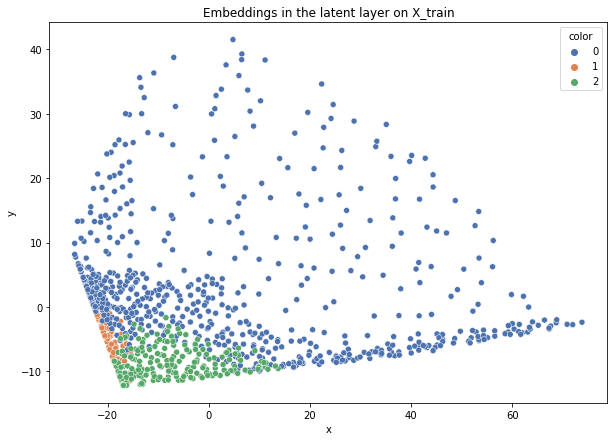

Softmax-f1: 0.786
Softmax-gmean: 0.764


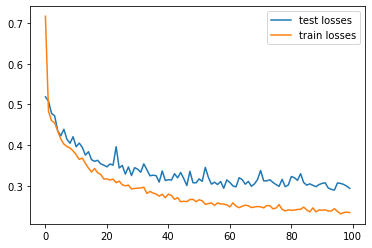

100%|██████████| 960/960 [00:00<00:00, 3507.88it/s]


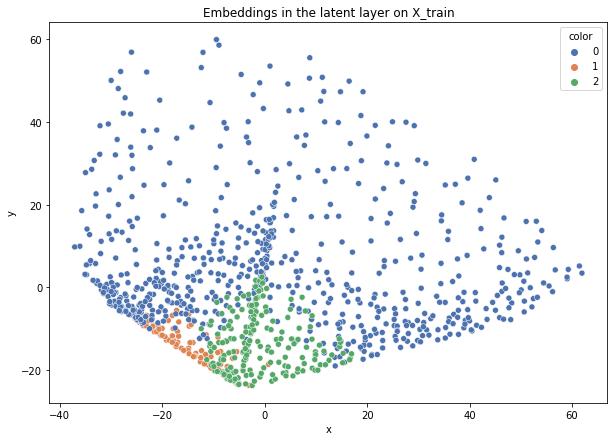

Softmax-f1: 0.789
Softmax-gmean: 0.763


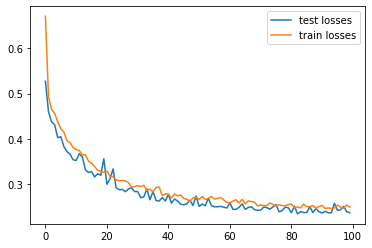

100%|██████████| 960/960 [00:00<00:00, 3430.93it/s]


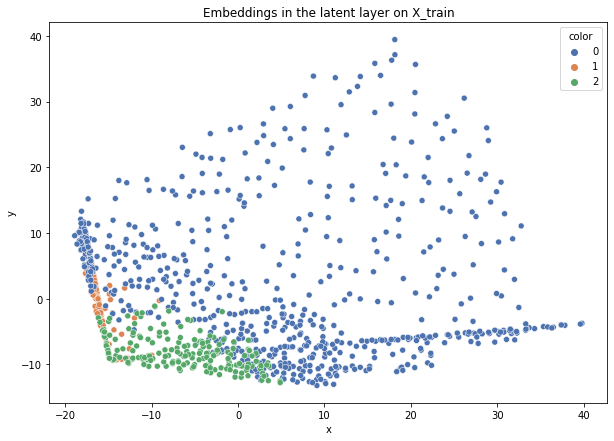

Softmax-f1: 0.799
Softmax-gmean: 0.746
3mocniej-cut


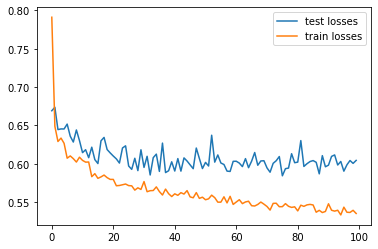

100%|██████████| 960/960 [00:00<00:00, 2820.89it/s]


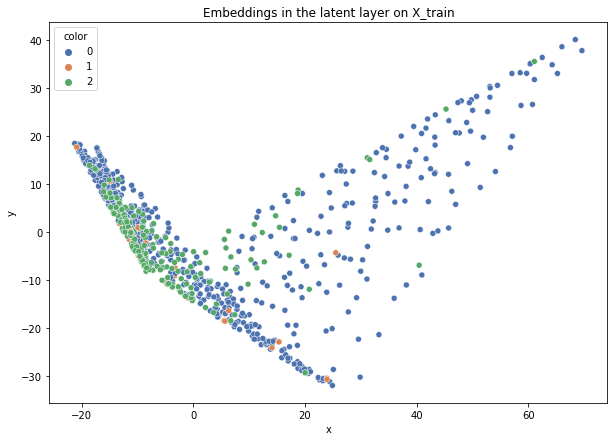

Softmax-f1: 0.559
Softmax-gmean: 0.414


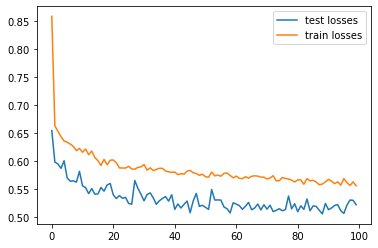

100%|██████████| 960/960 [00:00<00:00, 3372.72it/s]


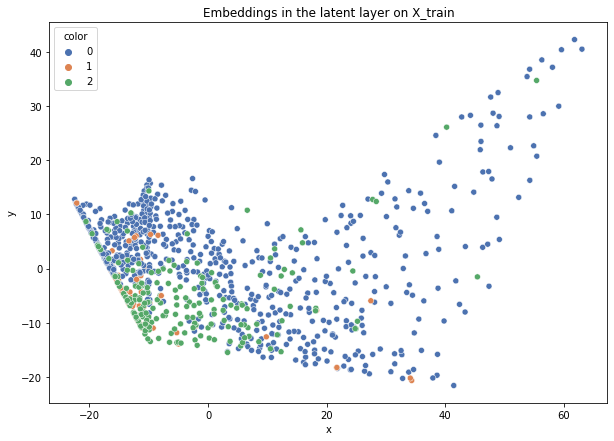

Softmax-f1: 0.642
Softmax-gmean: 0.522


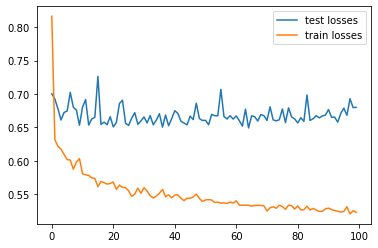

100%|██████████| 960/960 [00:00<00:00, 3308.25it/s]


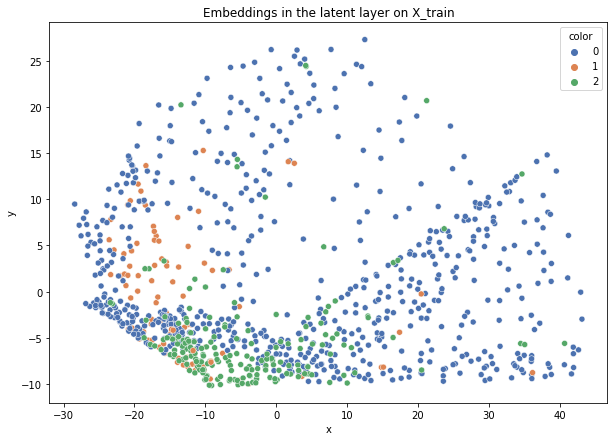

Softmax-f1: 0.573
Softmax-gmean: 0.422


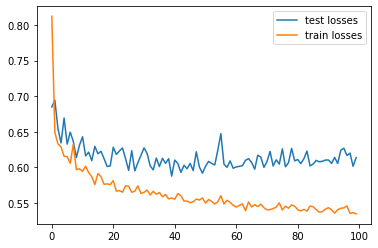

100%|██████████| 960/960 [00:00<00:00, 3420.55it/s]


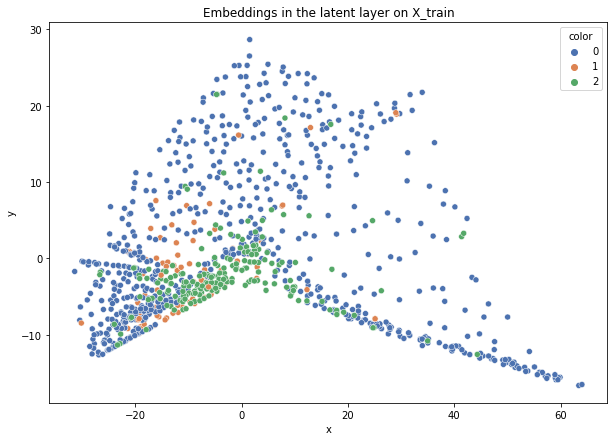

Softmax-f1: 0.531
Softmax-gmean: 0.34


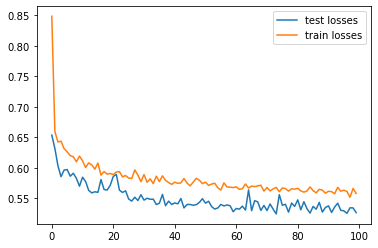

100%|██████████| 960/960 [00:00<00:00, 3495.85it/s]


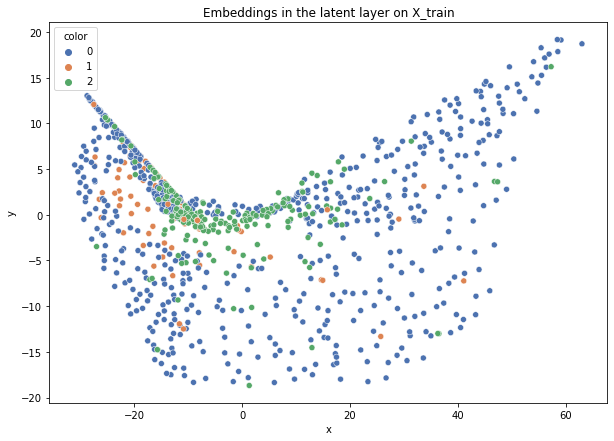

Softmax-f1: 0.552
Softmax-gmean: 0.36
4delikatne-bezover-cut


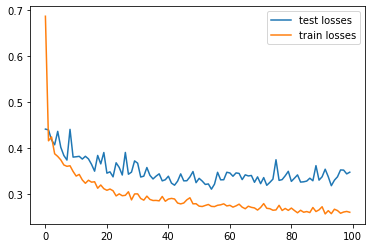

100%|██████████| 960/960 [00:00<00:00, 3549.63it/s]


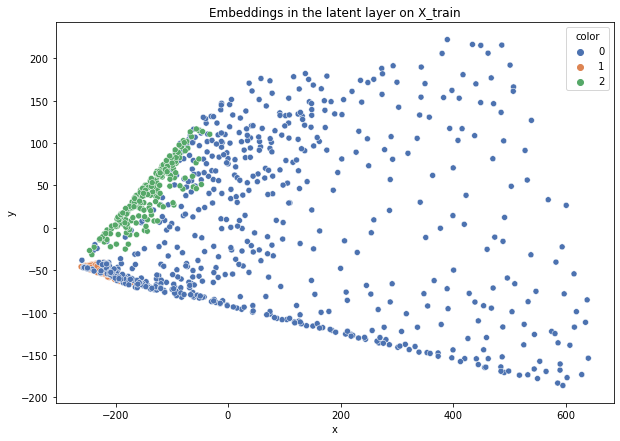

Softmax-f1: 0.795
Softmax-gmean: 0.751


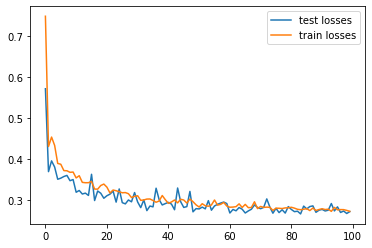

100%|██████████| 960/960 [00:00<00:00, 3432.65it/s]


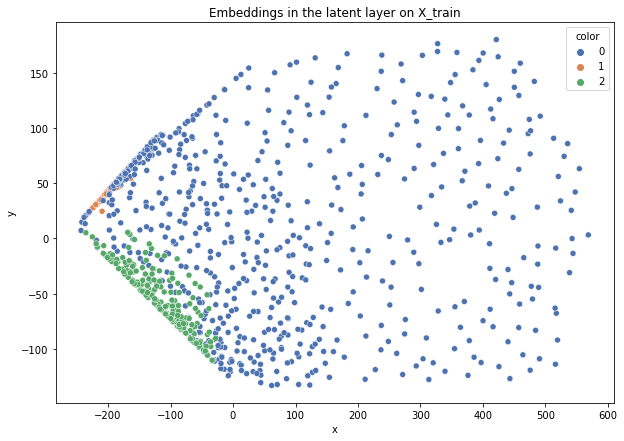

Softmax-f1: 0.826
Softmax-gmean: 0.84


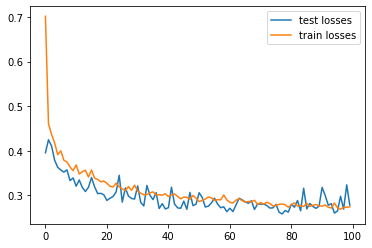

100%|██████████| 960/960 [00:00<00:00, 2773.07it/s]


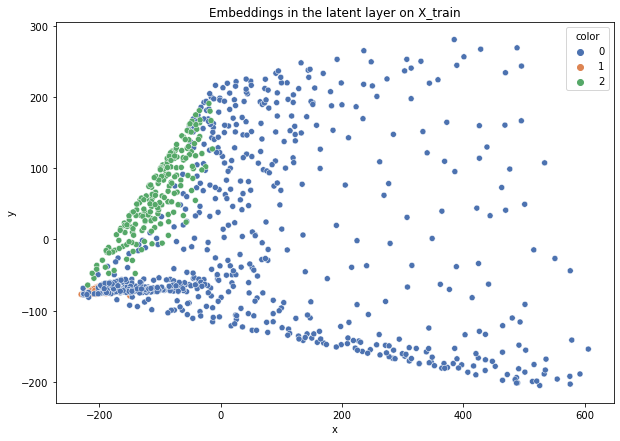

Softmax-f1: 0.83
Softmax-gmean: 0.817


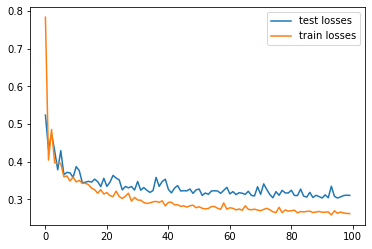

100%|██████████| 960/960 [00:00<00:00, 3447.46it/s]


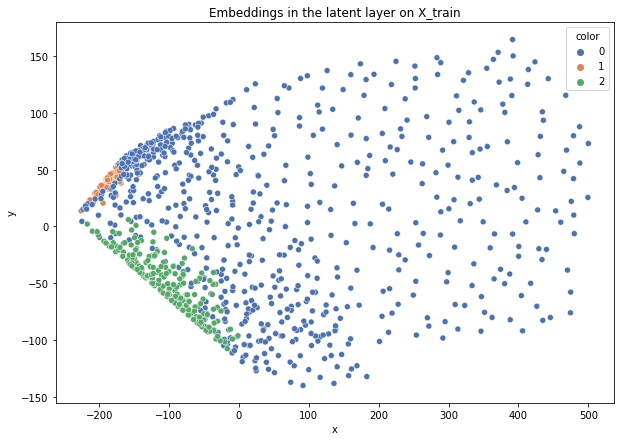

Softmax-f1: 0.767
Softmax-gmean: 0.723


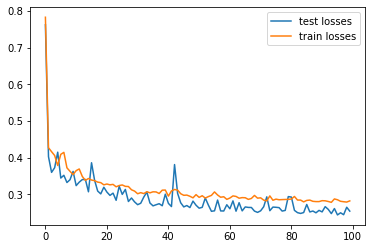

100%|██████████| 960/960 [00:00<00:00, 3348.81it/s]


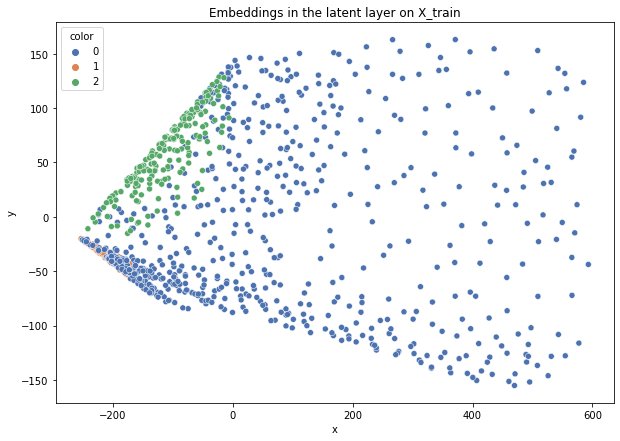

Softmax-f1: 0.793
Softmax-gmean: 0.708
balance-scale


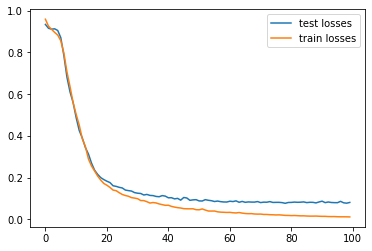

100%|██████████| 500/500 [00:00<00:00, 3214.52it/s]


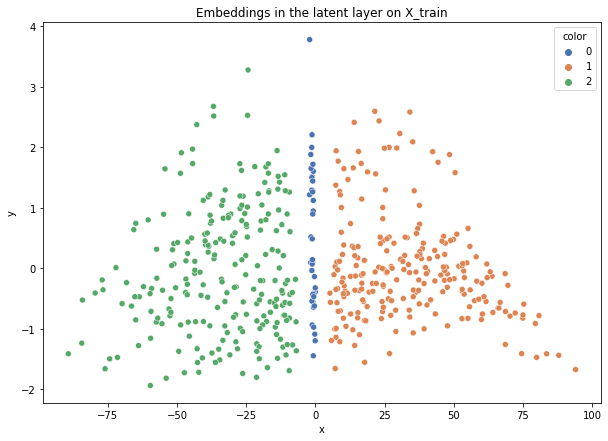

Softmax-f1: 0.948
Softmax-gmean: 0.982


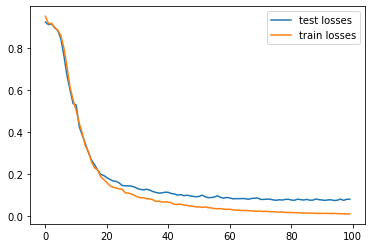

100%|██████████| 500/500 [00:00<00:00, 3405.40it/s]


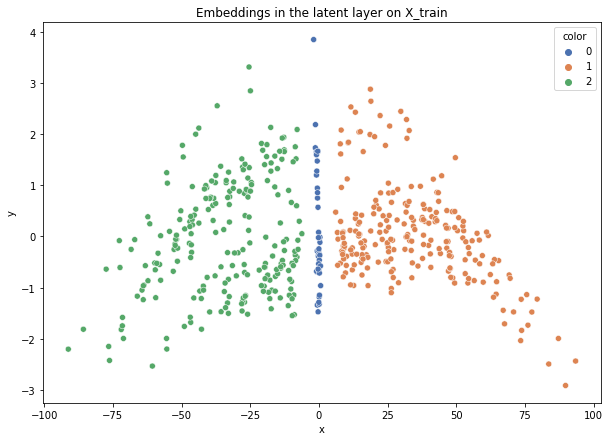

Softmax-f1: 0.933
Softmax-gmean: 0.977


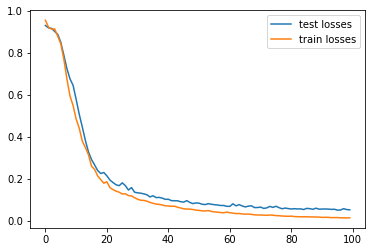

100%|██████████| 500/500 [00:00<00:00, 3348.25it/s]


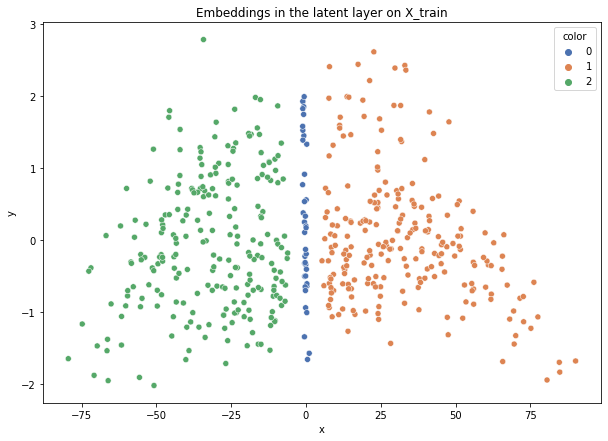

Softmax-f1: 0.964
Softmax-gmean: 0.988


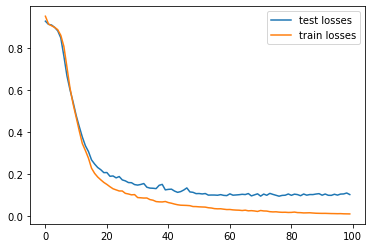

100%|██████████| 500/500 [00:00<00:00, 3330.22it/s]


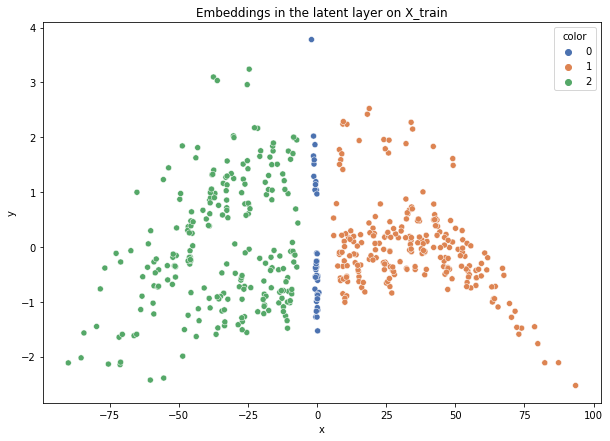

Softmax-f1: 0.919
Softmax-gmean: 0.971


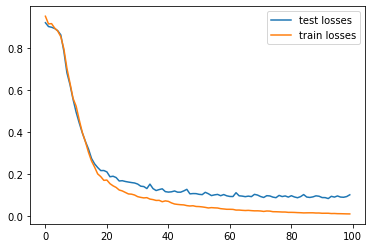

100%|██████████| 500/500 [00:00<00:00, 2372.15it/s]


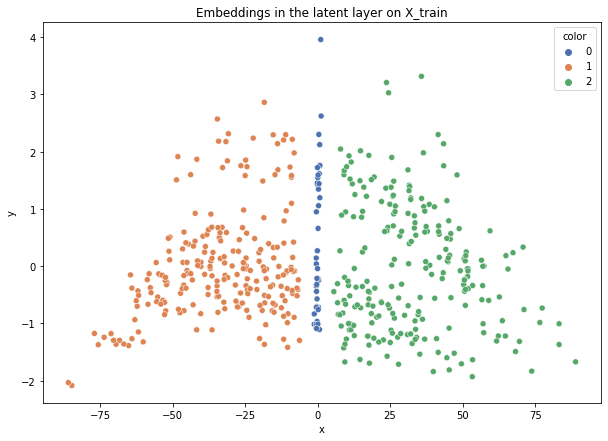

Softmax-f1: 0.913
Softmax-gmean: 0.971
cleveland


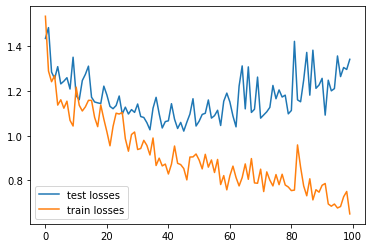

100%|██████████| 242/242 [00:00<00:00, 3433.49it/s]


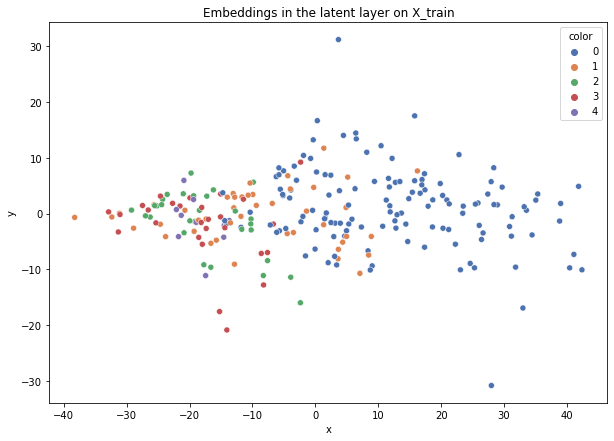

Softmax-f1: 0.302
Softmax-gmean: 0.087


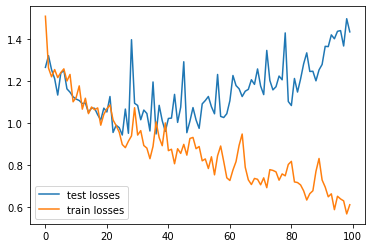

100%|██████████| 242/242 [00:00<00:00, 3336.32it/s]


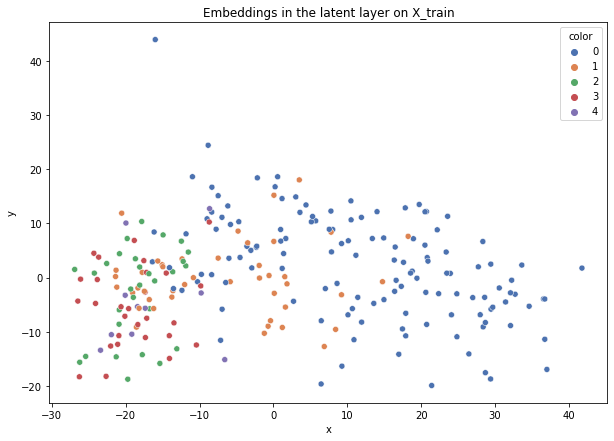

Softmax-f1: 0.288
Softmax-gmean: 0.102


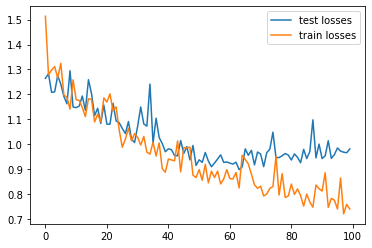

100%|██████████| 242/242 [00:00<00:00, 3339.84it/s]


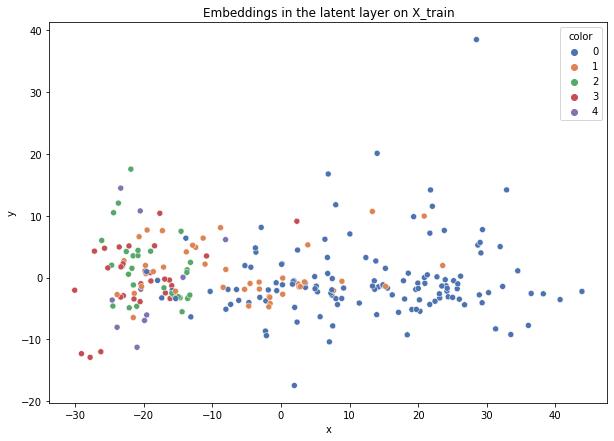

Softmax-f1: 0.374
Softmax-gmean: 0.123


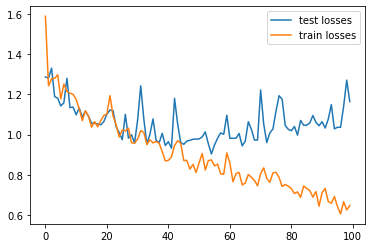

100%|██████████| 243/243 [00:00<00:00, 3500.55it/s]


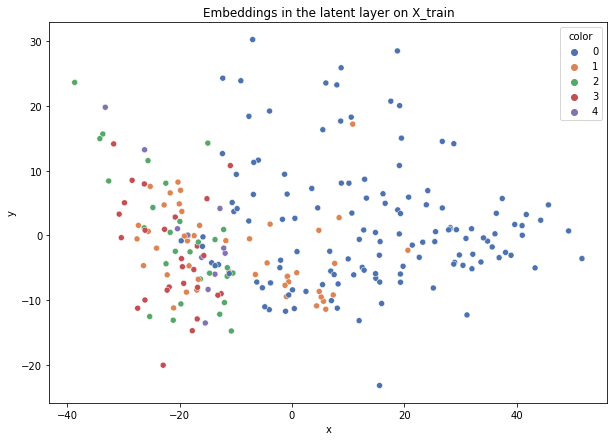

Softmax-f1: 0.38
Softmax-gmean: 0.122


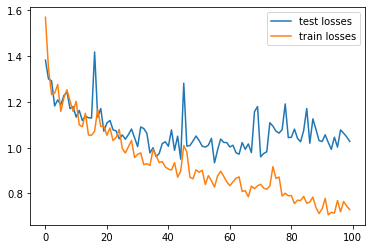

100%|██████████| 243/243 [00:00<00:00, 3473.76it/s]


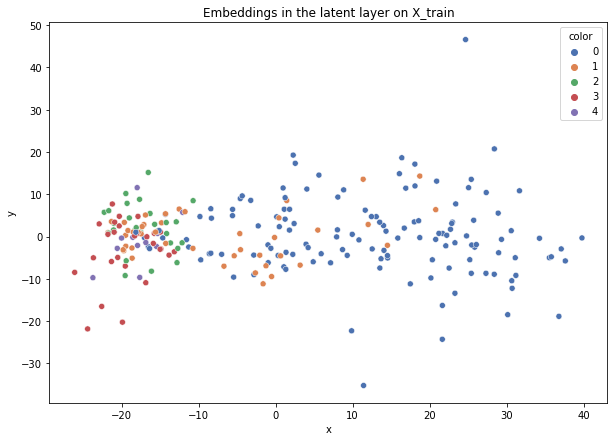

Softmax-f1: 0.312
Softmax-gmean: 0.097
cleveland_v2


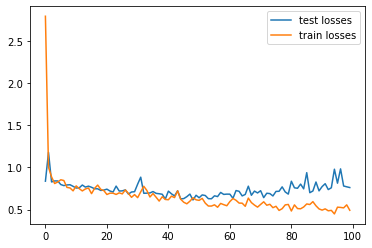

100%|██████████| 242/242 [00:00<00:00, 3439.81it/s]


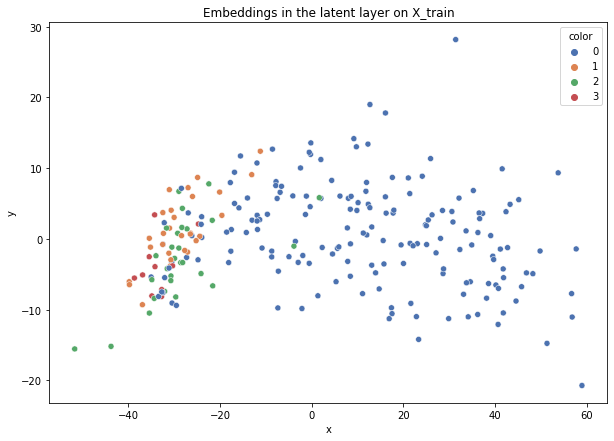

Softmax-f1: 0.441
Softmax-gmean: 0.114


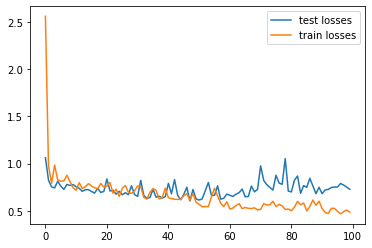

100%|██████████| 242/242 [00:00<00:00, 1822.96it/s]


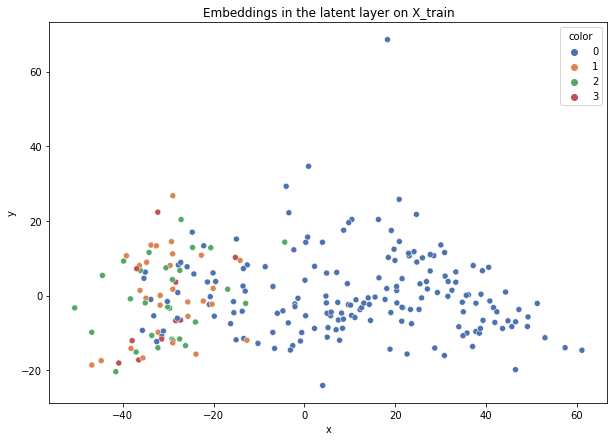

Softmax-f1: 0.441
Softmax-gmean: 0.115


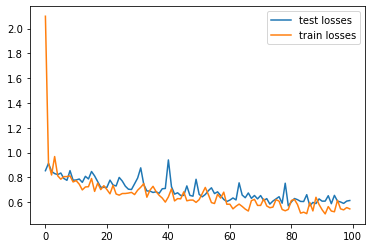

100%|██████████| 242/242 [00:00<00:00, 3362.08it/s]


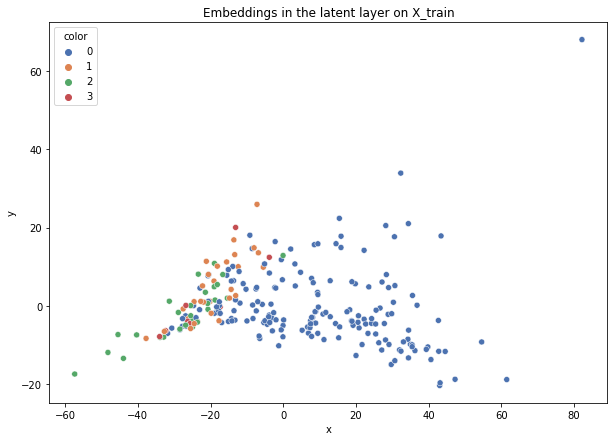

Softmax-f1: 0.304
Softmax-gmean: 0.023


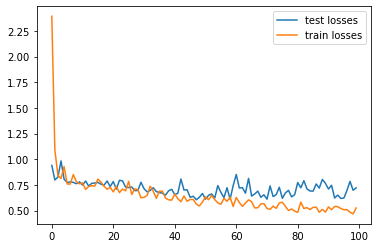

100%|██████████| 243/243 [00:00<00:00, 3438.84it/s]


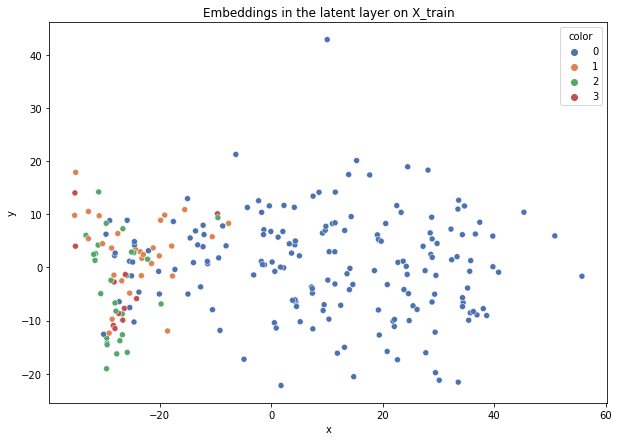

Softmax-f1: 0.261
Softmax-gmean: 0.019


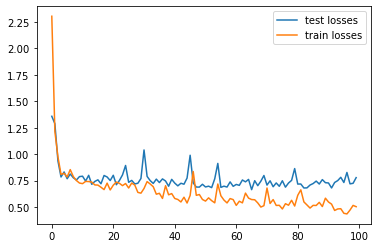

100%|██████████| 243/243 [00:00<00:00, 3338.27it/s]


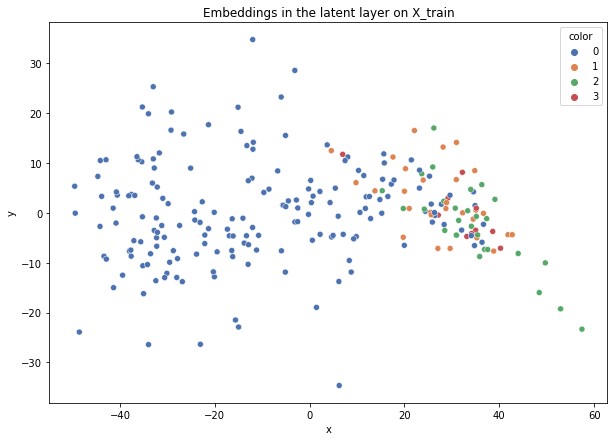

Softmax-f1: 0.37
Softmax-gmean: 0.097
glass


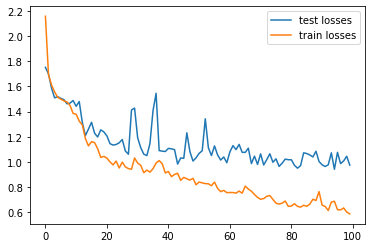

100%|██████████| 171/171 [00:00<00:00, 3427.73it/s]


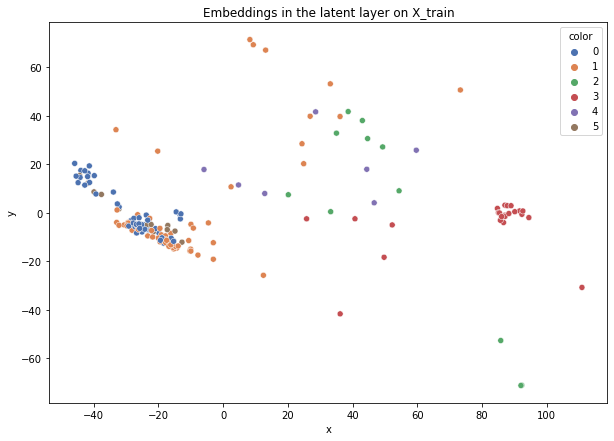

Softmax-f1: 0.499
Softmax-gmean: 0.08


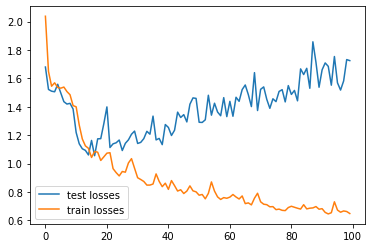

100%|██████████| 171/171 [00:00<00:00, 3411.56it/s]


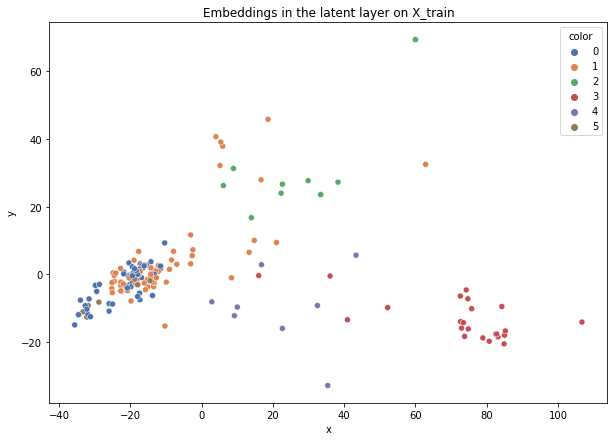

Softmax-f1: 0.49
Softmax-gmean: 0.084


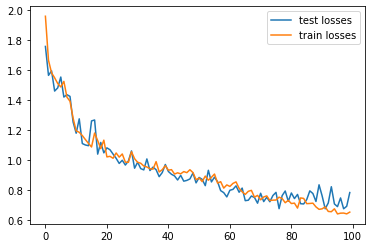

100%|██████████| 171/171 [00:00<00:00, 3414.34it/s]


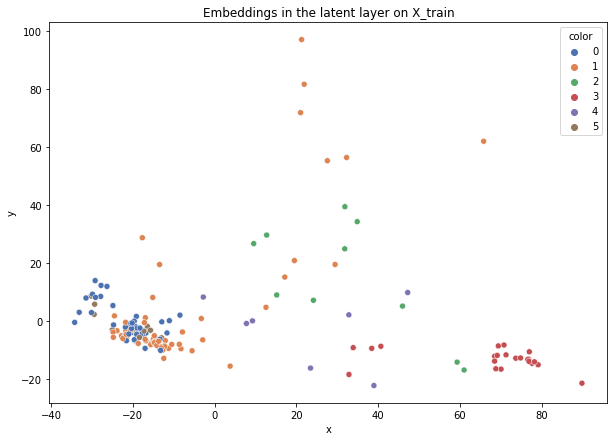

Softmax-f1: 0.641
Softmax-gmean: 0.241


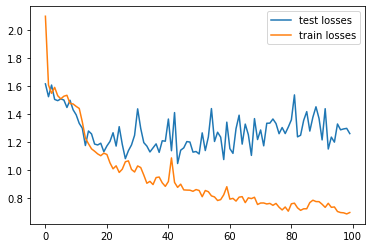

100%|██████████| 171/171 [00:00<00:00, 3347.89it/s]


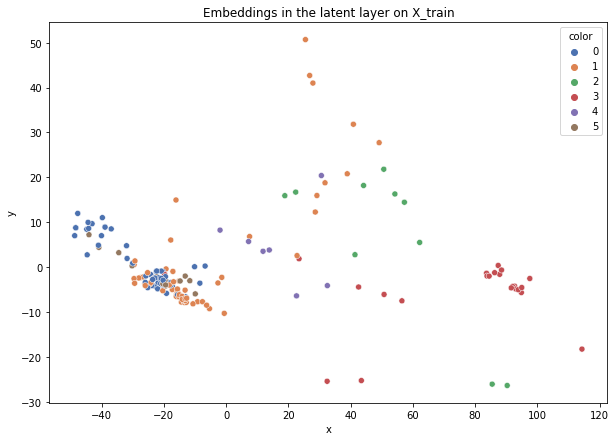

Softmax-f1: 0.378
Softmax-gmean: 0.068


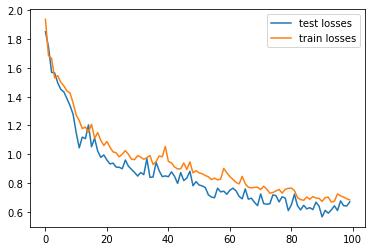

100%|██████████| 172/172 [00:00<00:00, 3372.35it/s]


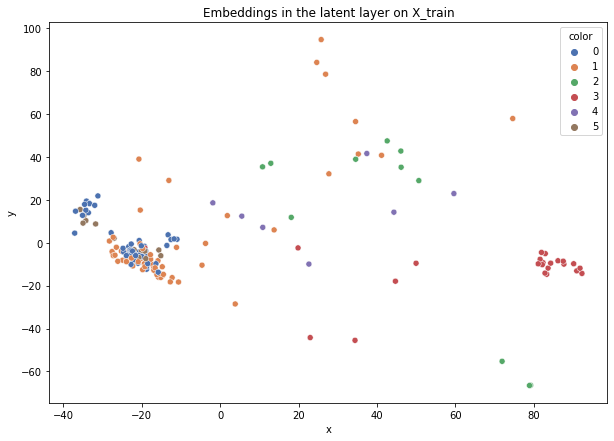

Softmax-f1: 0.683
Softmax-gmean: 0.279
new_ecoli


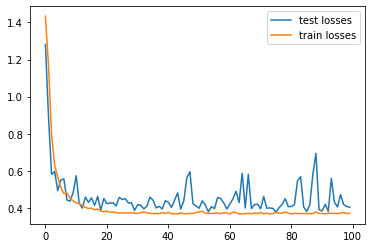

100%|██████████| 268/268 [00:00<00:00, 3548.75it/s]


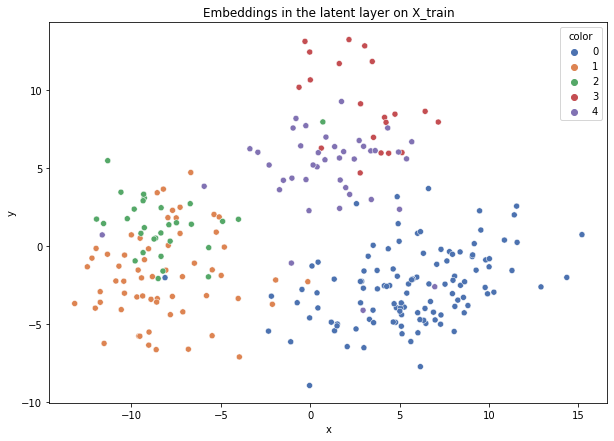

Softmax-f1: 0.818
Softmax-gmean: 0.769


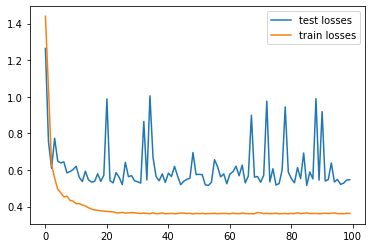

100%|██████████| 269/269 [00:00<00:00, 3439.33it/s]


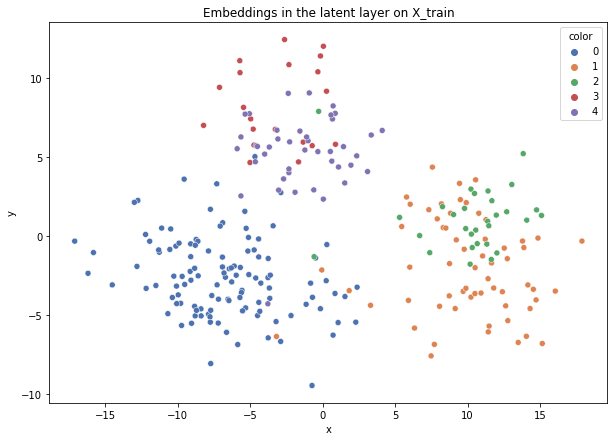

Softmax-f1: 0.819
Softmax-gmean: 0.786


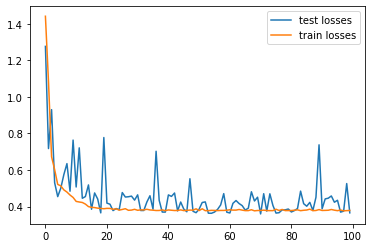

100%|██████████| 269/269 [00:00<00:00, 3444.24it/s]


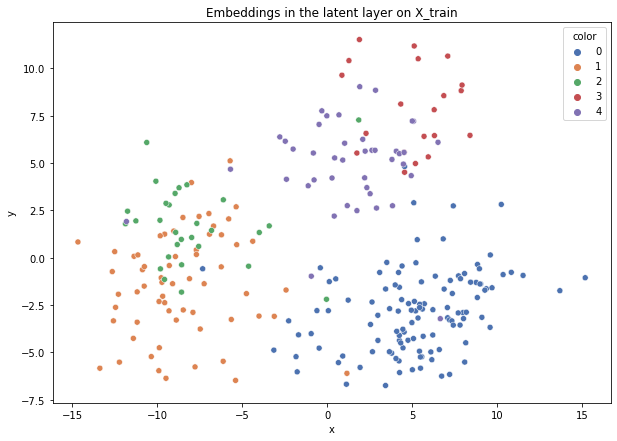

Softmax-f1: 0.764
Softmax-gmean: 0.706


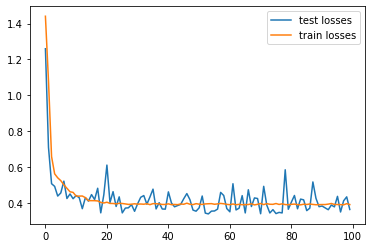

100%|██████████| 269/269 [00:00<00:00, 3327.27it/s]


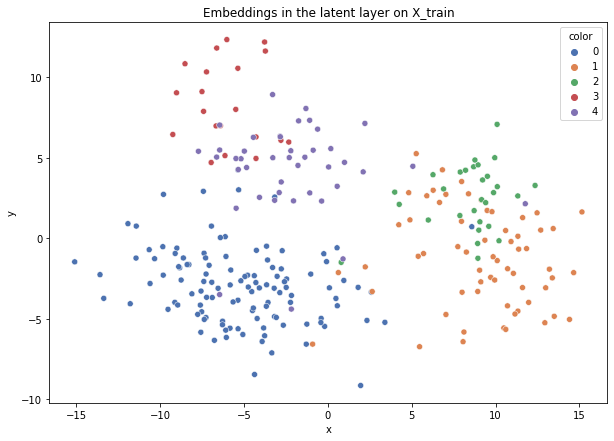

Softmax-f1: 0.792
Softmax-gmean: 0.746


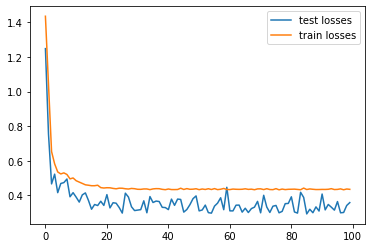

100%|██████████| 269/269 [00:00<00:00, 1934.87it/s]


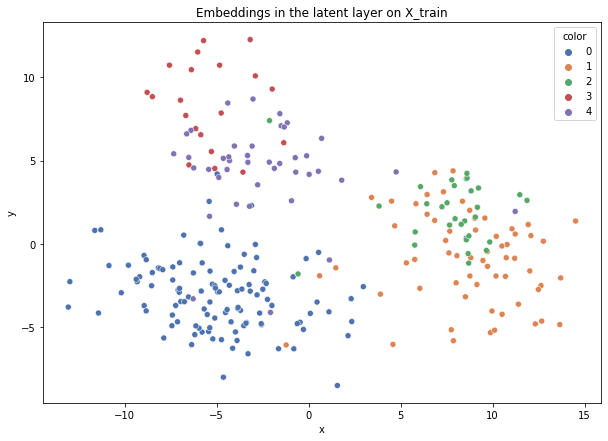

Softmax-f1: 0.796
Softmax-gmean: 0.759
new_led7digit


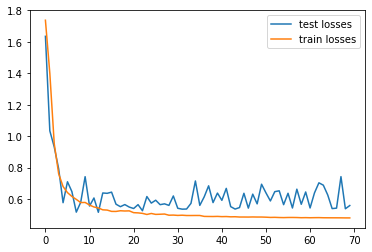

100%|██████████| 400/400 [00:00<00:00, 3378.58it/s]


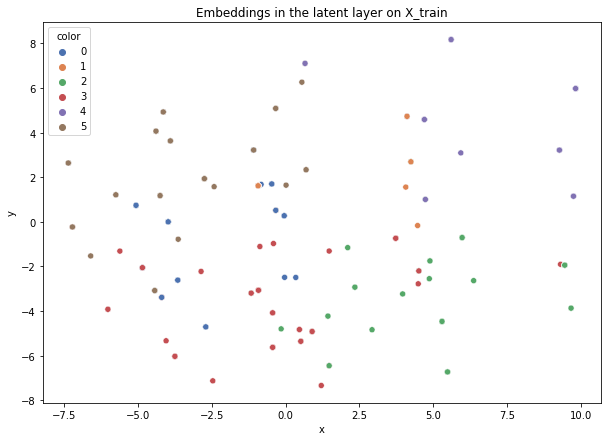

Softmax-f1: 0.773
Softmax-gmean: 0.762


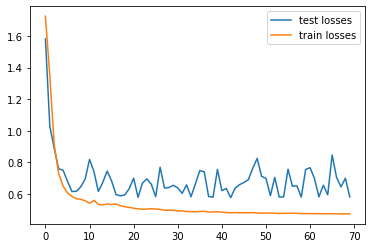

100%|██████████| 400/400 [00:00<00:00, 3441.59it/s]


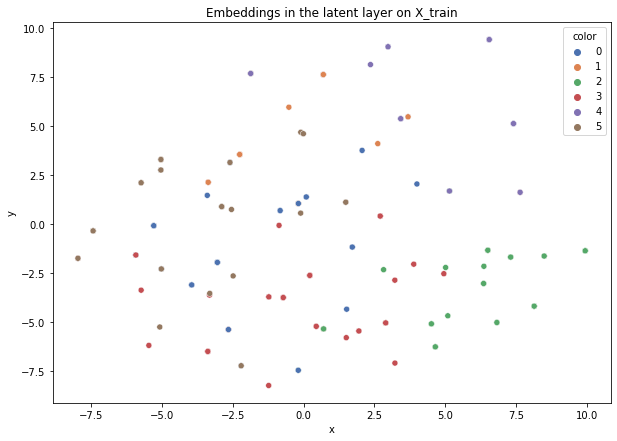

Softmax-f1: 0.773
Softmax-gmean: 0.732


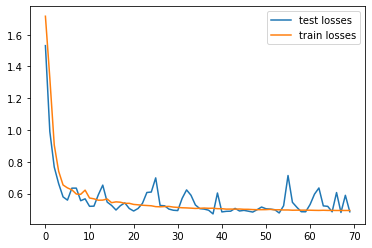

100%|██████████| 400/400 [00:00<00:00, 3274.75it/s]


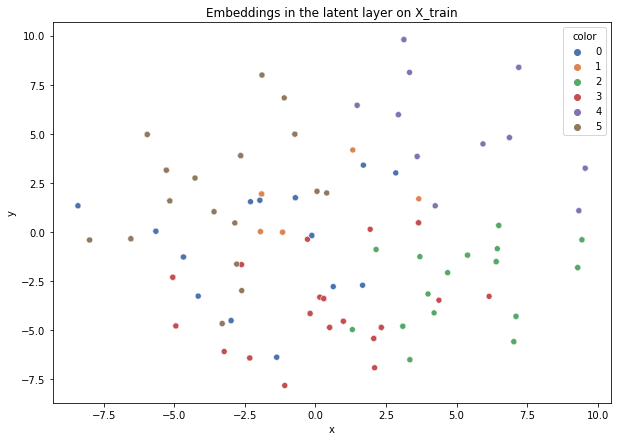

Softmax-f1: 0.796
Softmax-gmean: 0.785


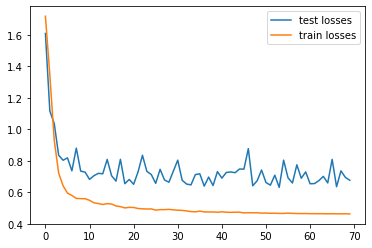

100%|██████████| 400/400 [00:00<00:00, 3466.78it/s]


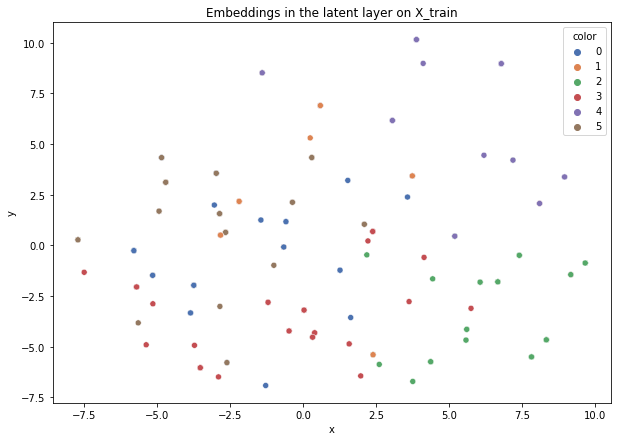

Softmax-f1: 0.782
Softmax-gmean: 0.769


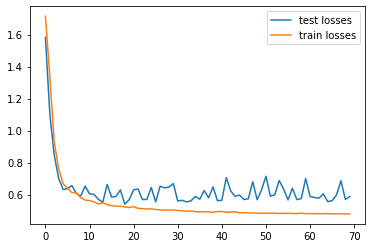

100%|██████████| 400/400 [00:00<00:00, 3272.06it/s]


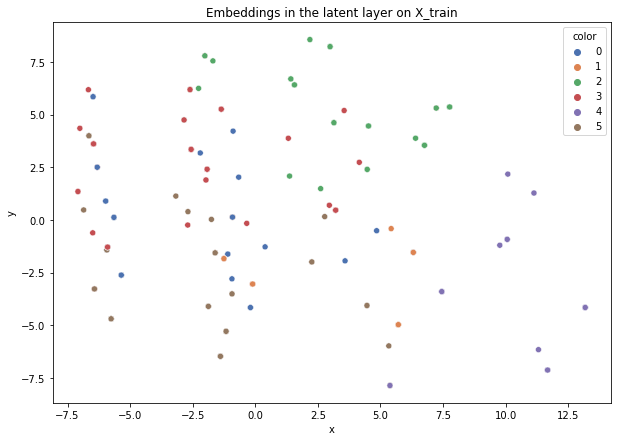

Softmax-f1: 0.819
Softmax-gmean: 0.822
new_winequality-red


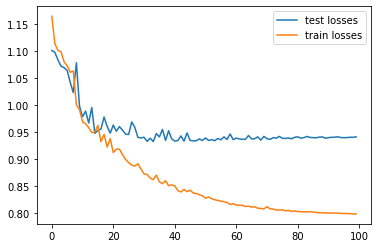

100%|██████████| 1279/1279 [00:00<00:00, 3337.79it/s]


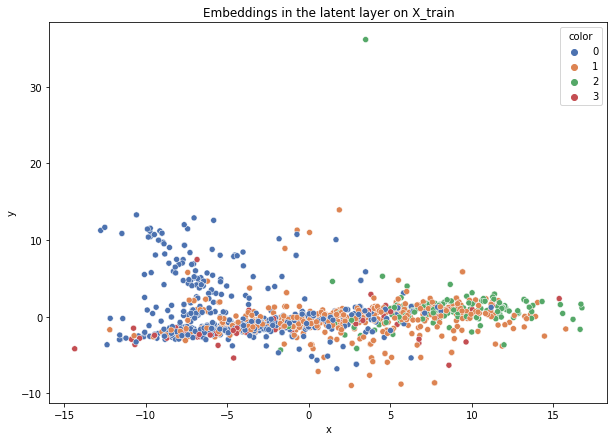

Softmax-f1: 0.43
Softmax-gmean: 0.115


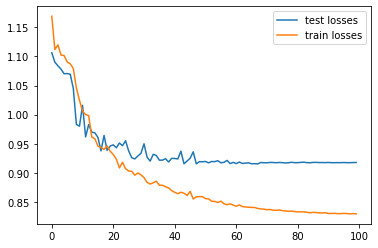

100%|██████████| 1279/1279 [00:00<00:00, 3329.91it/s]


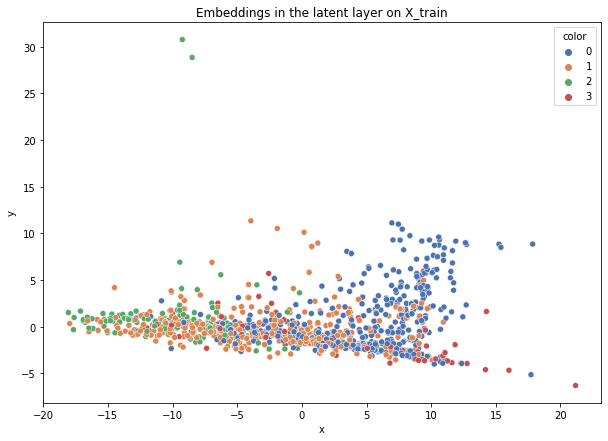

Softmax-f1: 0.432
Softmax-gmean: 0.113


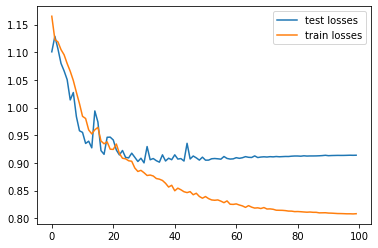

100%|██████████| 1279/1279 [00:00<00:00, 3506.81it/s]


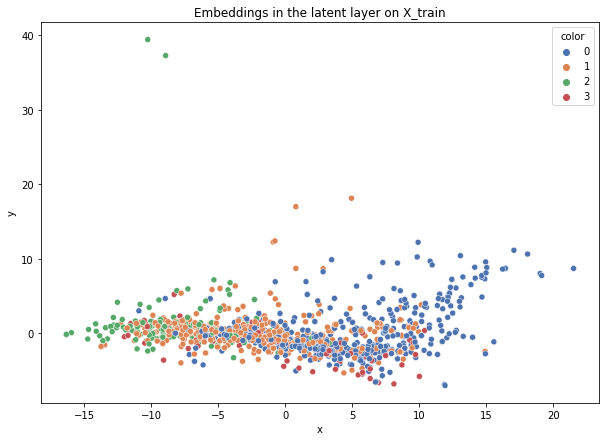

Softmax-f1: 0.457
Softmax-gmean: 0.322


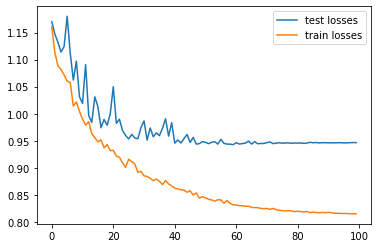

100%|██████████| 1279/1279 [00:00<00:00, 3396.64it/s]


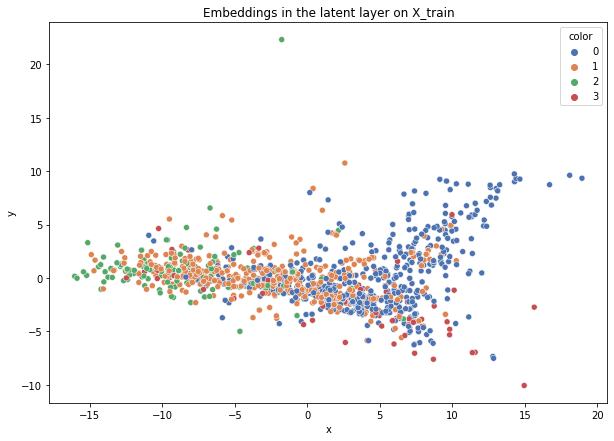

Softmax-f1: 0.381
Softmax-gmean: 0.103


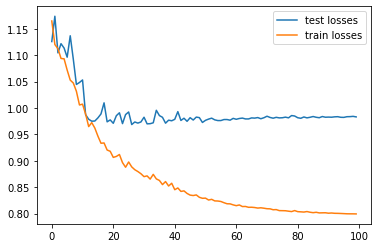

100%|██████████| 1280/1280 [00:00<00:00, 3252.04it/s]


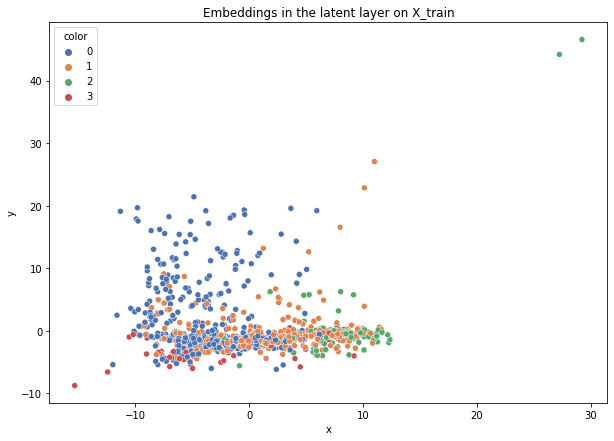

Softmax-f1: 0.504
Softmax-gmean: 0.423
thyroid-newthyroid


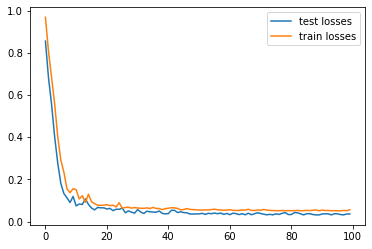

100%|██████████| 172/172 [00:00<00:00, 3376.25it/s]


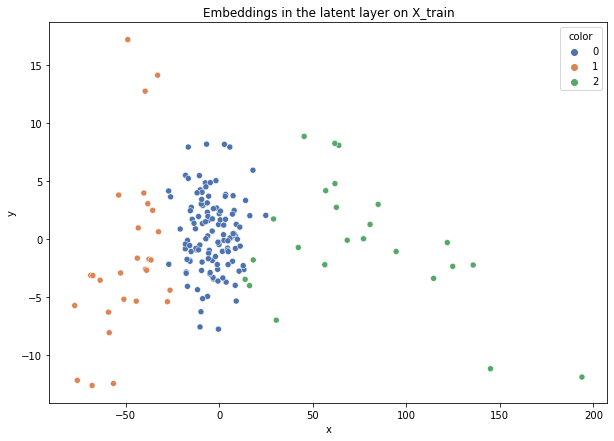

Softmax-f1: 1.0
Softmax-gmean: 1.0


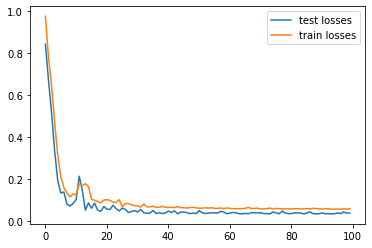

100%|██████████| 172/172 [00:00<00:00, 3399.01it/s]


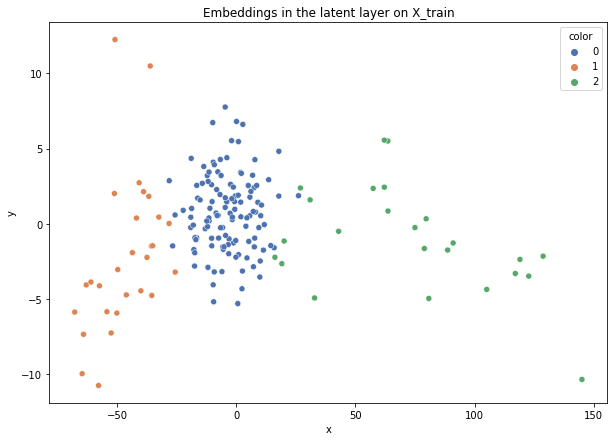

Softmax-f1: 0.972
Softmax-gmean: 0.989


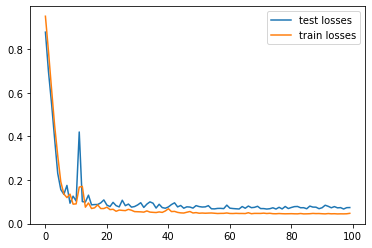

100%|██████████| 172/172 [00:00<00:00, 3301.97it/s]


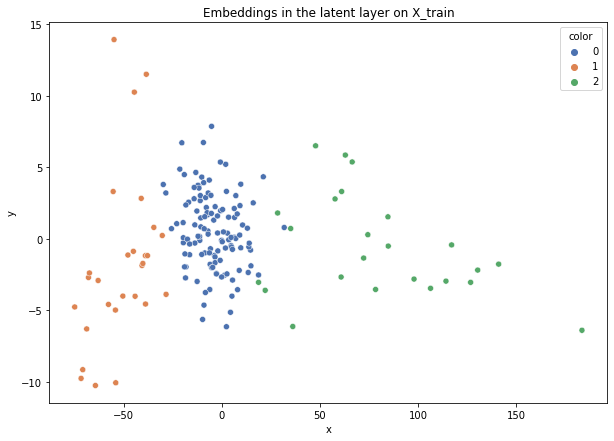

Softmax-f1: 0.936
Softmax-gmean: 0.93


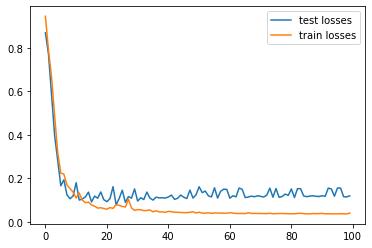

100%|██████████| 172/172 [00:00<00:00, 3494.58it/s]


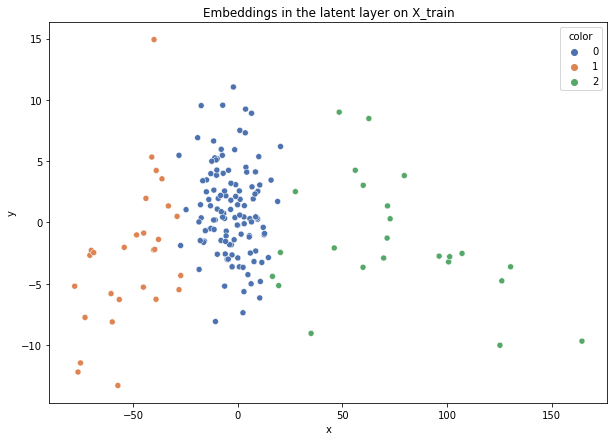

Softmax-f1: 0.969
Softmax-gmean: 0.989


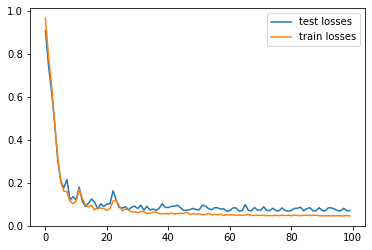

100%|██████████| 172/172 [00:00<00:00, 3471.00it/s]


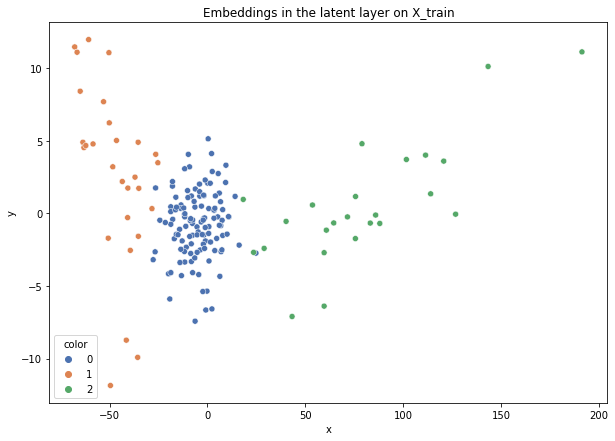

Softmax-f1: 0.923
Softmax-gmean: 0.874


In [11]:
use_cuda = True
device = torch.device("cuda" if use_cuda else "cpu")

result_dict = defaultdict(list)

if test_all_ds:
    ds_names = dt_name_to_cols_to_encode.keys()
else:
    ds_names = [ds_name]
for dataset_name in ds_names:
    print(dataset_name)
    result_dict["dataset"].append(dataset_name)
    fold_result_dict = defaultdict(list)

    X, y = datasets[dataset_name]['data'], datasets[dataset_name]['target']
    X_encoded, y = datasets[f"{dataset_name}_encoded"]['data'], datasets[f"{dataset_name}_encoded"]['target']
    
    skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    n_splits = skf.get_n_splits(X, y)
    
    folds = []
    if test_on_all_folds:
        folds = skf.split(X, y)
    else:
        folds = list(skf.split(X, y))[1:2]
        
    for train_index, test_index in folds:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        X_train_enc, X_test_enc = X_encoded[train_index], X_encoded[test_index]
        
        cfg = config[dataset_name]
        
        model = ex.train_classification(X_train_enc, y_train, X_test_enc, y_test, cfg)
        
        # Visualize embeddings
        dataset1 = TensorDataset(torch.Tensor(X_train_enc), torch.Tensor(y_train))
        test_loader1 = torch.utils.data.DataLoader(dataset1, batch_size=1)
        
        embeddings, labels = calc_embeddings(model, device, test_loader1)
        pca = PCA(n_components=2)
        plot_embeddings(pca.fit_transform(embeddings), y_train)
        plt.title("Embeddings in the latent layer on X_train")
        plt.show() 
        
        dataset2 = TensorDataset(torch.Tensor(X_test_enc), torch.Tensor(y_test))
        test_loader2 = torch.utils.data.DataLoader(dataset2, batch_size=1)
        
        preds = []
        model.eval()
        with torch.no_grad():
            for data, target in test_loader2:
                data, target = data.to(device), target.to(device)
                output = model(data)
                pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
                preds.append(pred.item())
#                 print(f"Pred: {pred.item()}, target: {target.item()}, output: {output}")

        clf_name = "Softmax"
        gmean = gmean_score(y_test, preds)
        f1 = f1_score(y_test, preds, average='macro')
        fold_result_dict[f"{clf_name}-f1"].append(f1)
        fold_result_dict[f"{clf_name}-gmean"].append(gmean)
            
        
        for key in sorted(list(fold_result_dict.keys())):
            print(f"{key}: {np.round(fold_result_dict[key][-1],3)}")
            
    for k in fold_result_dict:
        result_dict[k].append(np.mean(fold_result_dict[k]))

In [12]:
results_df = pd.DataFrame.from_dict(result_dict)

In [13]:
results_df

dataset  Softmax-f1  Softmax-gmean
0                      cmc    0.541574       0.535408
1              dermatology    0.951615       0.944425
2               hayes-roth    0.890265       0.884633
3              new_vehicle    0.935270       0.930039
4                new_yeast    0.530218       0.278105
5              1czysty-cut    0.930118       0.916312
6           2delikatne-cut    0.793279       0.760418
7             3mocniej-cut    0.571517       0.411583
8   4delikatne-bezover-cut    0.802191       0.767740
9            balance-scale    0.935086       0.977828
10               cleveland    0.331058       0.106077
11            cleveland_v2    0.363452       0.073687
12                   glass    0.538016       0.150201
13               new_ecoli    0.797891       0.753257
14           new_led7digit    0.788492       0.773982
15     new_winequality-red    0.440816       0.215193
16      thyroid-newthyroid    0.959956       0.956314

In [14]:
results_df.filter(regex=("dataset|Softmax-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

In [15]:
results_df.filter(regex=("dataset|Softmax-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)